# Importing the Data sets

In [1]:
# Main Libraries
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Part 1:
from wordcloud import WordCloud, STOPWORDS

# Part 2:
import statsmodels.formula.api as smf
import datetime

# Part 3:
import statsmodels.tsa.api as tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
from sklearn.metrics import mean_squared_error

# Part 4:
import geopandas as gpd
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn import neighbors
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
import sklearn.metrics as mes
from sklearn.model_selection import train_test_split

In [2]:
#Read reviews
r1 = pd.read_excel("https://github.com/MrJay7/PDS/blob/main/Data/reviews_1.xlsx?raw=true")
r2 = pd.read_excel("https://github.com/MrJay7/PDS/blob/main/Data/reviews_2.xlsx?raw=true")
r3 = pd.read_excel("https://github.com/MrJay7/PDS/blob/main/Data/reviews_3.xlsx?raw=true")
r4 = pd.read_excel("https://github.com/MrJay7/PDS/blob/main/Data/reviews_4.xlsx?raw=true")
r5 = pd.read_excel("https://github.com/MrJay7/PDS/blob/main/Data/reviews_5.xlsx?raw=true")
r6 = pd.read_excel("https://github.com/MrJay7/PDS/blob/main/Data/reviews_6.xlsx?raw=true")
reviews = pd.concat([r1,r2,r3,r4,r5,r6], ignore_index = True)

In [3]:
#Read rest of Data
calendar = pd.read_csv("https://github.com/MrJay7/PDS/blob/main/calendar.csv.gz?raw=true",compression='gzip')
listings = pd.read_csv("https://github.com/MrJay7/PDS/blob/main/listings.csv.gz?raw=true",compression='gzip')
neighbourhoods = pd.read_csv("https://github.com/MrJay7/PDS/blob/main/neighbourhoods.csv?raw=true")
geo_neighb = gpd.read_file("https://github.com/MrJay7/PDS/blob/main/neighbourhoods.geojson?raw=true")
events_vs_reviews = pd.read_csv("https://github.com/MrJay7/PDS/blob/main/Events%20vs%20reviews.csv?raw=true")
events_vs_reviews1 = pd.read_csv("https://github.com/MrJay7/PDS/blob/main/events%20vs%20reviews%201.csv?raw=true")

In [4]:
#rounding off decimal place to 2 decimals for code like "describe", ect
pd.set_option('display.float_format', lambda x: '%.2f' % x,)

In [5]:
calendar

listing_id        date available    price adjusted_price  \
0          39032385  2021-12-10         f   $63.00         $63.00   
1              6499  2021-12-10         f   $40.00         $40.00   
2              6499  2021-12-11         f   $40.00         $40.00   
3              6499  2021-12-12         f   $40.00         $40.00   
4              6499  2021-12-13         f   $40.00         $40.00   
...             ...         ...       ...      ...            ...   
6762432    53538106  2022-12-04         t  $185.00        $185.00   
6762433    53538106  2022-12-05         t  $185.00        $185.00   
6762434    53538106  2022-12-06         t  $185.00        $185.00   
6762435    53538106  2022-12-07         t  $185.00        $185.00   
6762436    53538106  2022-12-08         t  $185.00        $185.00   

         minimum_nights  maximum_nights  
0                  3.00         1125.00  
1                  3.00          365.00  
2                  3.00          365.00  
3                  3.00          365.00  
4                  3.00          365.00  
...                 ...             ...  
6762432            2.00          999.00  
6762433            2.00          999.00  
6762434            2.00          999.00  
6762435            2.00          999.00  
6762436            2.00          999.00  

[6762437 rows x 7 columns]

In [6]:
listings.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18526 entries, 0 to 18525
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18526 non-null  int64  
 1   listing_url                                   18526 non-null  object 
 2   scrape_id                                     18526 non-null  int64  
 3   last_scraped                                  18526 non-null  object 
 4   name                                          18518 non-null  object 
 5   description                                   18507 non-null  object 
 6   neighborhood_overview                         12054 non-null  object 
 7   picture_url                                   18526 non-null  object 
 8   host_id                                       18526 non-null  int64  
 9   host_url                                      18526 non-null 

In [7]:
neighbourhoods

neighbourhood_group                               neighbourhood
0               Alenquer                Abrigada e Cabanas de Torres
1               Alenquer  Aldeia Galega da Merceana e Aldeia Gavinha
2               Alenquer             Alenquer (Santo Estvo e Triana)
3               Alenquer                                     Carnota
4               Alenquer                        Carregado e Cadafais
..                   ...                                         ...
129  Vila Franca De Xira            Alverca do Ribatejo e Sobralinho
130  Vila Franca De Xira        Castanheira do Ribatejo e Cachoeiras
131  Vila Franca De Xira          Pvoa de Santa Iria e Forte da Casa
132  Vila Franca De Xira                                    Vialonga
133  Vila Franca De Xira                         Vila Franca de Xira

[134 rows x 2 columns]

In [8]:
reviews

listing_id                  id        date  reviewer_id reviewer_name  \
0             6499            18879225  2014-09-02     17027029        Simone   
1             6499            21074122  2014-10-11      7661611       Cláudio   
2             6499            24704004  2015-01-02     20348870       Rodrigo   
3             6499            37894945  2015-07-11     34762351      Blandine   
4             6499            41672462  2015-08-08     39438424       Mirjana   
...            ...                 ...         ...          ...           ...   
888608    53409215  505585213464000192  2021-11-28    407411408        Sanaga   
888609    53414853  506342584800263296  2021-11-29    398278891      Heejoong   
888610    53458315  504113851485003072  2021-11-26     25412098       Suellen   
888611    53487620  504144507695068480  2021-11-26    308750378        Melisa   
888612    53491572  512168913343764480  2021-12-07     20956607          Owen   

                                                 comments  
0       Ola Bruno,_x000D_<br/>_x000D_<br/>Tive um mes ...  
1       Encontramos o apartamento de Bruno exatamente ...  
2       Estivemos em Lisboa por aproximadamente 03 (tr...  
3       Superbe quartier très proche du tram et du tra...  
4       Très bel appartement, bien situé et à proximit...  
...                                                   ...  
888608  Good location and clean house. The communicati...  
888609  정말 완벽한 숙소 에요 호스트분께서 친절하게 설명해 주시고 주변으로 <br/>맛집이...  
888610  Gostei muito da hospedagem, tudo muito limpo, ...  
888611  Eine sehr tolle Unterkunft. Kann ich nur weite...  
888612  I had a great experience staying at Carla's ap...  

[888613 rows x 6 columns]

In [9]:
events_vs_reviews

date              Events
0       7/24/2010  NOS Alive & Prince
1        9/5/2010                 NaN
2       9/15/2010                 NaN
3       12/6/2010                 NaN
4        1/1/2011                 NaN
...           ...                 ...
888614  12/9/2021                 NaN
888615  12/9/2021                 NaN
888616  12/9/2021                 NaN
888617  12/9/2021                 NaN
888618  12/9/2021                 NaN

[888619 rows x 2 columns]

In [10]:
events_vs_reviews1

date  listing_id              Events
0       7/24/2010       29915  NOS Alive & Prince
1        9/5/2010       29915                 NaN
2       9/15/2010       29915                 NaN
3       12/6/2010       29915                 NaN
4        1/1/2011       29248                 NaN
...           ...         ...                 ...
888614  12/9/2021    40707720                 NaN
888615  12/9/2021    45200079                 NaN
888616  12/9/2021    46088655                 NaN
888617  12/9/2021    47595149                 NaN
888618  12/9/2021    48348757                 NaN

[888619 rows x 3 columns]

# Part 1 - The relationship between the classification of a super host and reviews 

In [11]:
data=listings.drop(['listing_url',
                    'scrape_id',
                    'name',
                    'description',
                    'last_scraped',
                    'neighborhood_overview',
                    'picture_url',
                    'host_id',
                    'host_url',
                    'host_name',
                    'host_since',
                    'host_location',
                    'host_about',
                    'host_response_time',
                    'host_thumbnail_url',
                    'host_picture_url',
                    'host_neighbourhood',
                    'host_listings_count',
                    'host_total_listings_count',
                    'host_verifications',
                    'host_has_profile_pic',
                    'host_identity_verified',
                    'neighbourhood_group_cleansed',
                    'latitude',
                    'longitude',
                    'property_type',
                    'room_type',
                    'accommodates',
                    'bathrooms',
                    'bathrooms_text',
                    'minimum_nights',
                    'maximum_nights',
                    'minimum_minimum_nights',
                    'maximum_minimum_nights',
                    'minimum_maximum_nights',
                    'maximum_maximum_nights',
                    'minimum_nights_avg_ntm',
                    'maximum_nights_avg_ntm',
                    'calendar_updated',
                    'has_availability',
                    'availability_30',
                    'availability_60',
                    'availability_90',
                    'availability_365',
                    'calendar_last_scraped',
                    'number_of_reviews',
                    'number_of_reviews_ltm',
                    'number_of_reviews_l30d',
                    'first_review',
                    'last_review',
                    'review_scores_accuracy',
                    'review_scores_cleanliness',
                    'review_scores_checkin',
                    'review_scores_communication',
                    'review_scores_location',
                    'review_scores_value',
                    'license',
                    'instant_bookable',
                    'calculated_host_listings_count',
                    'calculated_host_listings_count_entire_homes',
                    'calculated_host_listings_count_private_rooms',
                    'calculated_host_listings_count_shared_rooms',
                    'reviews_per_month'],axis=1)
    
data['host_response_rate'] = data['host_response_rate'].str.replace('%','') 
data['host_acceptance_rate'] = data['host_acceptance_rate'].str.replace('%','')
data['price'] = data['price'].str.replace('$','')

data.host_response_rate = data.host_response_rate.astype('float') 
data.host_acceptance_rate = data.host_acceptance_rate.astype('float') 
data.host_is_superhost = data.host_is_superhost.astype('string') 
data.review_scores_rating = data.review_scores_rating.astype('float') 

updated_data = data.dropna(axis=0)


/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/3668996400.py:67: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['price'] = data['price'].str.replace('$','')


### Finding super hosts: #

* Conditions to be super host: 
    * host_response_rate>90% 
    * host_acceptence_rate<1% 
    * reviews_score_ratting>=4.8 

In [12]:
super_host=updated_data.loc[(updated_data['host_response_rate']>90.0) & (updated_data['host_acceptance_rate']>=99.0) & (updated_data['host_is_superhost'].str.startswith('t')) & (updated_data['review_scores_rating']>=4.8) & (updated_data['neighbourhood'].str.startswith('Lisbon, Portugal')), ['host_acceptance_rate','host_response_rate','review_scores_rating','amenities','beds', 'price','neighbourhood_cleansed']]


not_super_host=updated_data.loc[(updated_data['host_response_rate']<=90.0) & (updated_data['host_acceptance_rate']<99.0) & (updated_data['host_is_superhost'].str.startswith('f')) & (updated_data['review_scores_rating']<4.8) & (updated_data['neighbourhood'].str.startswith('Lisbon, Portugal')), ['host_response_rate','host_acceptance_rate','review_scores_rating', 'neighbourhood_cleansed', 'price','beds']]

#print(super_host)
not_super_host

host_response_rate  host_acceptance_rate  review_scores_rating  \
137                 75.00                 17.00                  4.51   
202                 50.00                  8.00                  4.52   
232                 80.00                 69.00                  4.75   
302                  0.00                  0.00                  4.48   
585                 81.00                 39.00                  4.25   
748                 90.00                 92.00                  4.13   
761                 90.00                 71.00                  4.42   
806                 81.00                 39.00                  4.16   
929                  0.00                  0.00                  4.25   
986                 80.00                 92.00                  4.68   
997                 87.00                 90.00                  4.52   
1074                80.00                 92.00                  4.68   
1205                73.00                 12.00                  4.77   
1318                 0.00                  0.00                  4.29   
1356                75.00                 20.00                  4.56   
1576                 0.00                  0.00                  4.33   
1933                85.00                 79.00                  4.56   
2644                90.00                 63.00                  4.50   
3082                75.00                 83.00                  4.66   
3234                50.00                 22.00                  4.43   
3587                57.00                  0.00                  4.70   
3822                86.00                 62.00                  4.66   
4794                90.00                 97.00                  4.70   
5798                64.00                 67.00                  4.45   
12161               60.00                 32.00                  4.50   
12162               60.00                 32.00                  4.50   
12745               90.00                 94.00                  4.25   

       neighbourhood_cleansed   price  beds  
137                   Arroios   26.00  2.00  
202                So Vicente   50.00  3.00  
232               Misericrdia   53.00  2.00  
302               Misericrdia   75.00  1.00  
585                   Areeiro   20.00  1.00  
748               Misericrdia   35.00  1.00  
761                   Olivais   20.00  1.00  
806                   Areeiro   32.00  2.00  
929                   Marvila   21.00  2.00  
986            Penha de Frana   58.00  3.00  
997                So Vicente   50.00  4.00  
1074                  Arroios   58.00  3.00  
1205                  Estrela   14.00  1.00  
1318                  Marvila   24.00  2.00  
1356        Santa Maria Maior   55.00  3.00  
1576                  Marvila   78.00  7.00  
1933        Santa Maria Maior   58.00  1.00  
2644                    Beato   40.00  2.00  
3082                     Belm   49.00  3.00  
3234                  Arroios   16.00  1.00  
3587        Santa Maria Maior   50.00  2.00  
3822        Santa Maria Maior   48.00  1.00  
4794   So Domingos de Benfica   80.00  2.00  
5798               So Vicente   58.00  1.00  
12161             Misericrdia  130.00  1.00  
12162             Misericrdia  115.00  1.00  
12745             Misericrdia   50.00  1.00

### Scatter matrix of the variables of a super host #

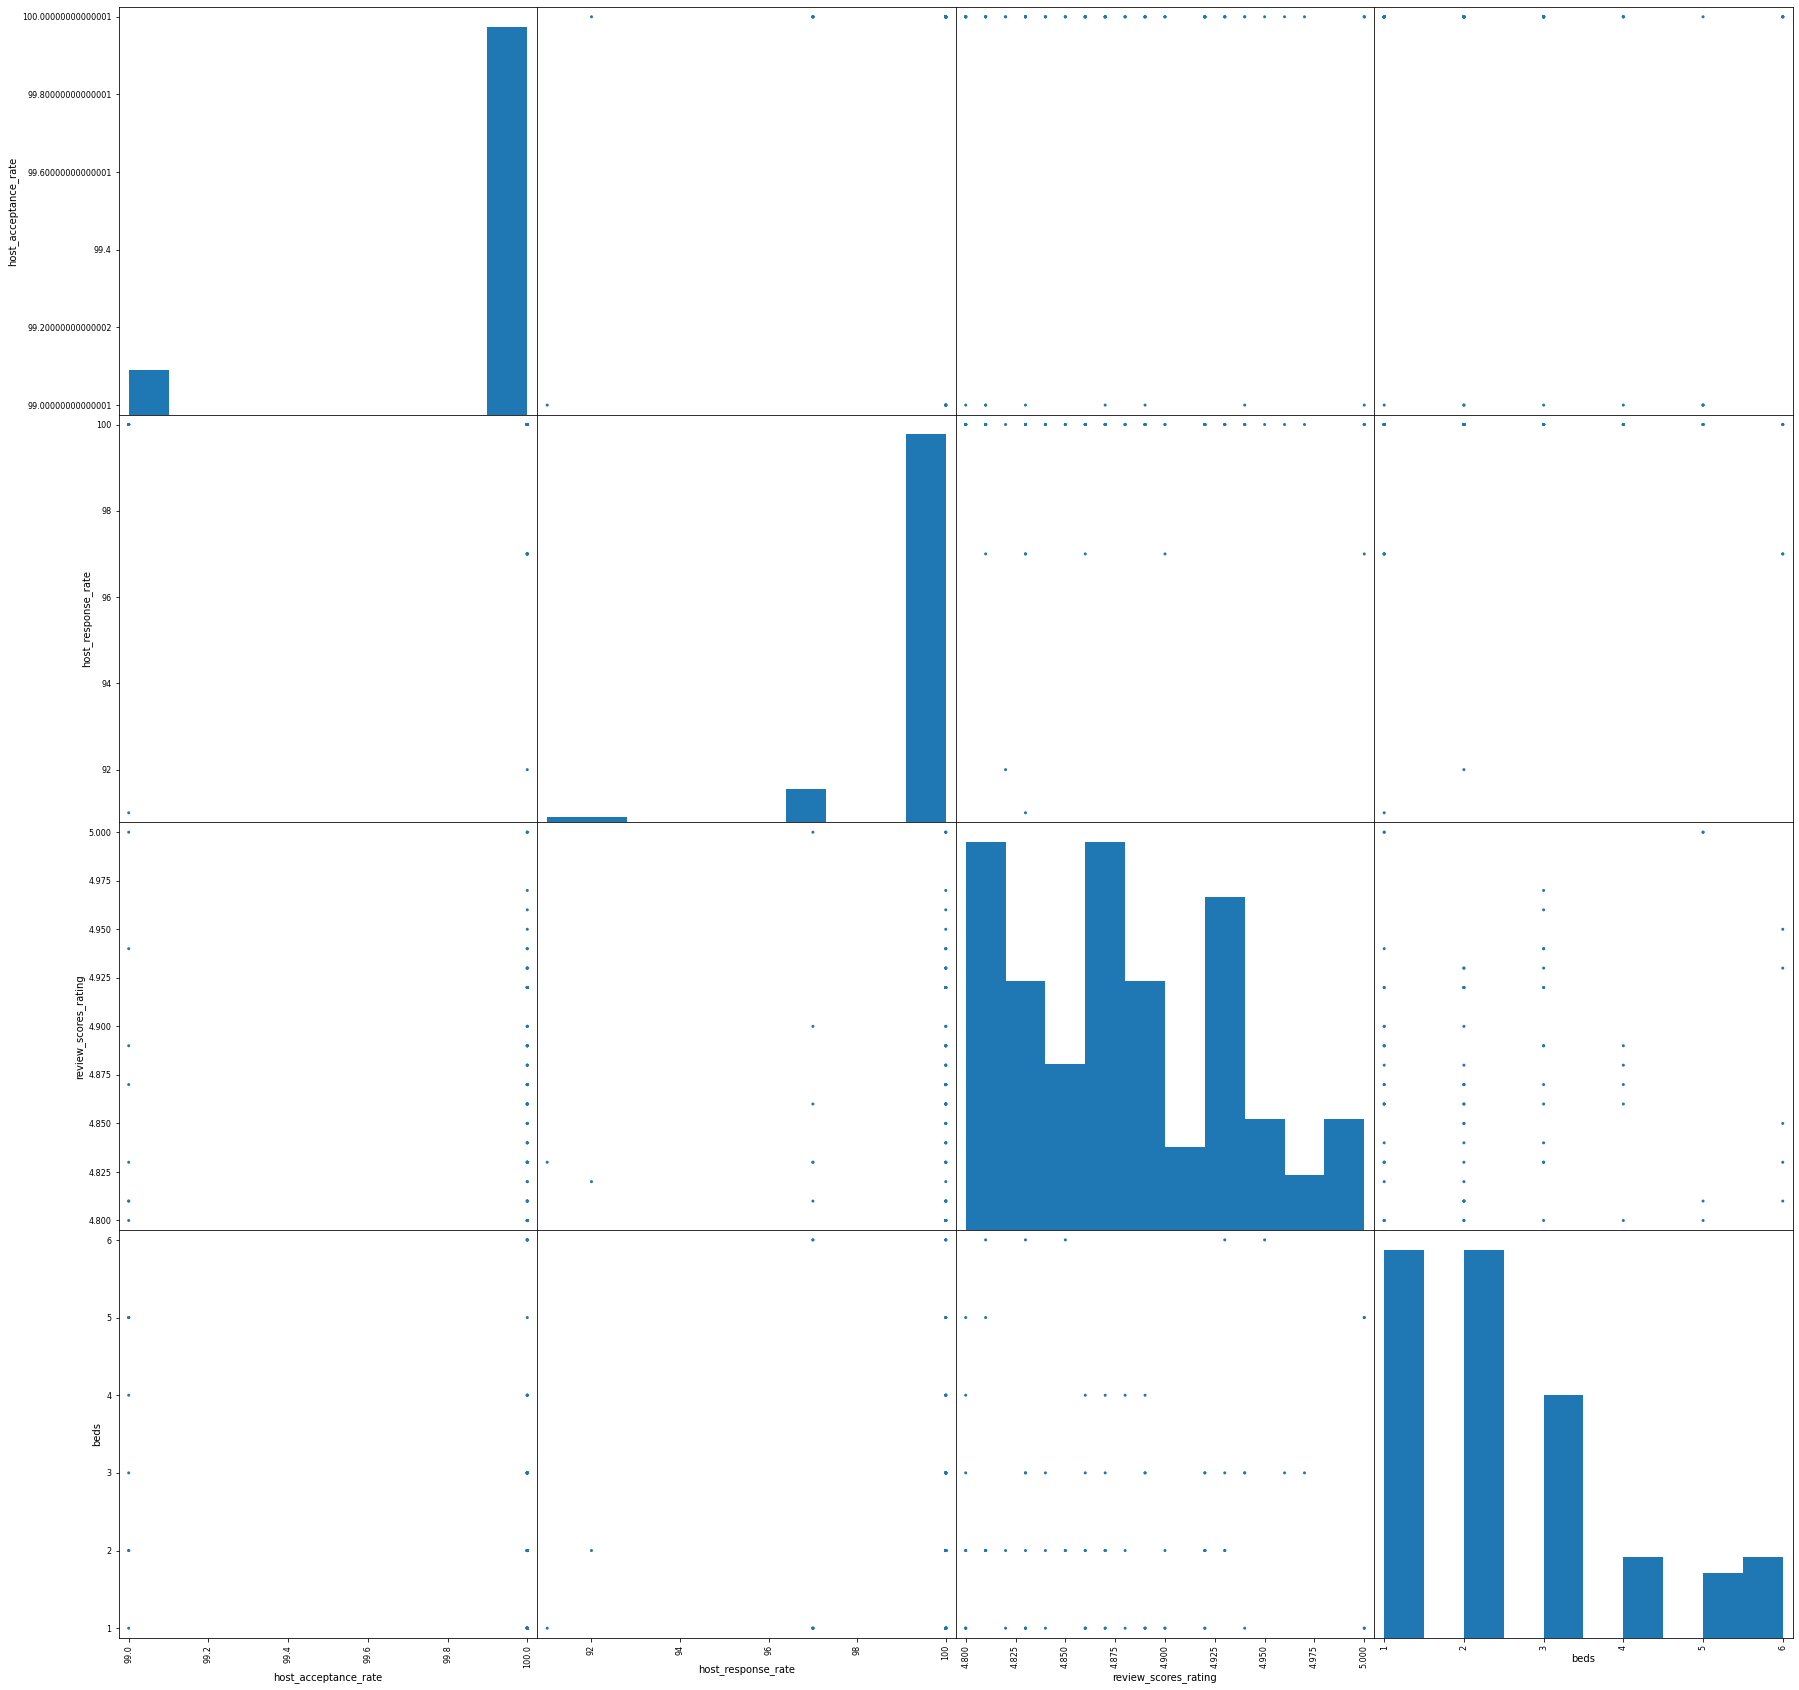

In [13]:
scatter=pd.plotting.scatter_matrix(super_host, figsize=(30,30), alpha=1)

In [14]:
super_host.dtypes

host_acceptance_rate      float64
host_response_rate        float64
review_scores_rating      float64
amenities                  object
beds                      float64
price                      object
neighbourhood_cleansed     object
dtype: object

### Plot neighbourhood of super hosts: #

<AxesSubplot:title={'center':'Number of superhosts by neighbourhood '}, xlabel='Neighbourhood', ylabel='No. of superhosts'>

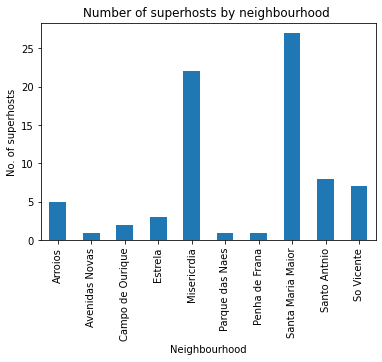

In [15]:
plt.xlabel('Neighbourhood')
plt.ylabel('No. of superhosts')
plt.title('Number of superhosts by neighbourhood ')

super_host['neighbourhood_cleansed'].value_counts().sort_index().plot.bar()

#-------CONCLUSION: Santa Maria Maior is the neighbourhood with more superhosts (+25)-----------

### Plot neighbourhood of not super hosts:

<AxesSubplot:title={'center':'Number of not superhosts by neighbourhood '}, xlabel='Neighbourhood', ylabel='No. of not superhosts'>

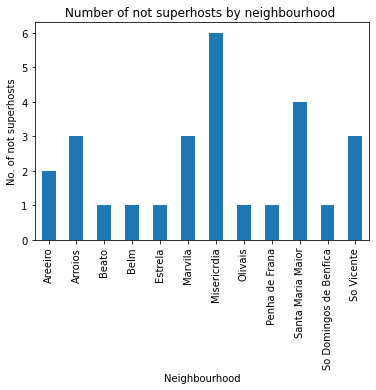

In [16]:
plt.xlabel('Neighbourhood')
plt.ylabel('No. of not superhosts')
plt.title('Number of not superhosts by neighbourhood ')

not_super_host['neighbourhood_cleansed'].value_counts().sort_index().plot.bar()

#-------CONCLUSION: Misericórdia is the neighbourhood with more not superhosts (6)-----------

### Plot the price of not super hosts: #

<AxesSubplot:title={'center':'Price of a not super host'}, xlabel='Price', ylabel='Quantity'>

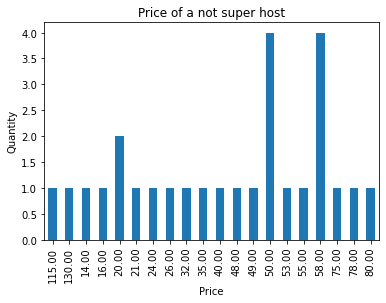

In [17]:
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Price of a not super host')

not_super_host['price'].value_counts().sort_index().plot.bar()

#-------CONCLUSION:50€ and 58€ are the most frequent prices for not super host-----------

### Plot price of super hosts: #

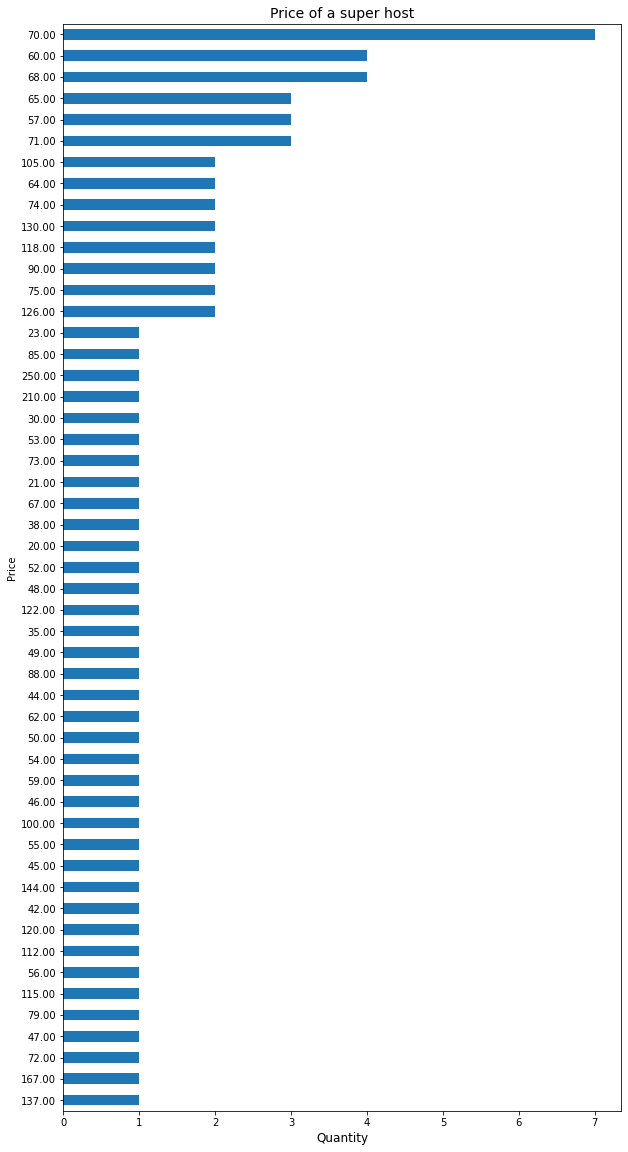

In [18]:
feq = super_host['price'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(10,20), width= 0.5)
plt.title('Price of a super host', fontsize=14)
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Price')
plt.show()

#-------CONCLUSION: 70€ is the most frequent price for super host-----------


### Plot beds of super hosts: #

<AxesSubplot:title={'center':'Number of beds by superhosts'}, xlabel='No. of beds', ylabel='No. of superhosts'>

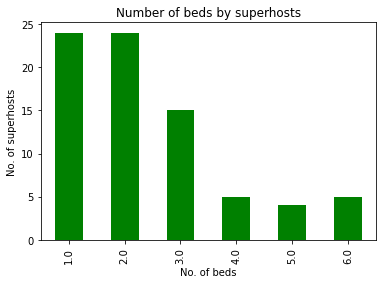

In [19]:
plt.xlabel('No. of beds')
plt.ylabel('No. of superhosts')
plt.title('Number of beds by superhosts')

super_host['beds'].value_counts().sort_index().plot.bar(color = 'green')
#---------CONCLUSION: about 64% of the superhosts have 1 or 2 beds-----

### Plot beds of not super hosts:

<AxesSubplot:title={'center':'Number of beds by not superhosts'}, xlabel='No. of beds', ylabel='No. of not superhosts'>

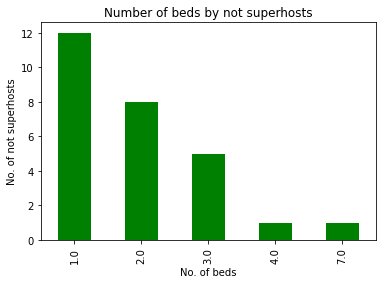

In [20]:
plt.xlabel('No. of beds')
plt.ylabel('No. of not superhosts')
plt.title('Number of beds by not superhosts')

not_super_host['beds'].value_counts().sort_index().plot.bar(color = 'green')
#---------CONCLUSION: Arounf 74% of the not super hosts have one or two beds-------

### Word Cloud of the amenities of a super hosts proporty: 

In [21]:
def plot_cloud(wordcloud): #define a function to plot word cloud
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

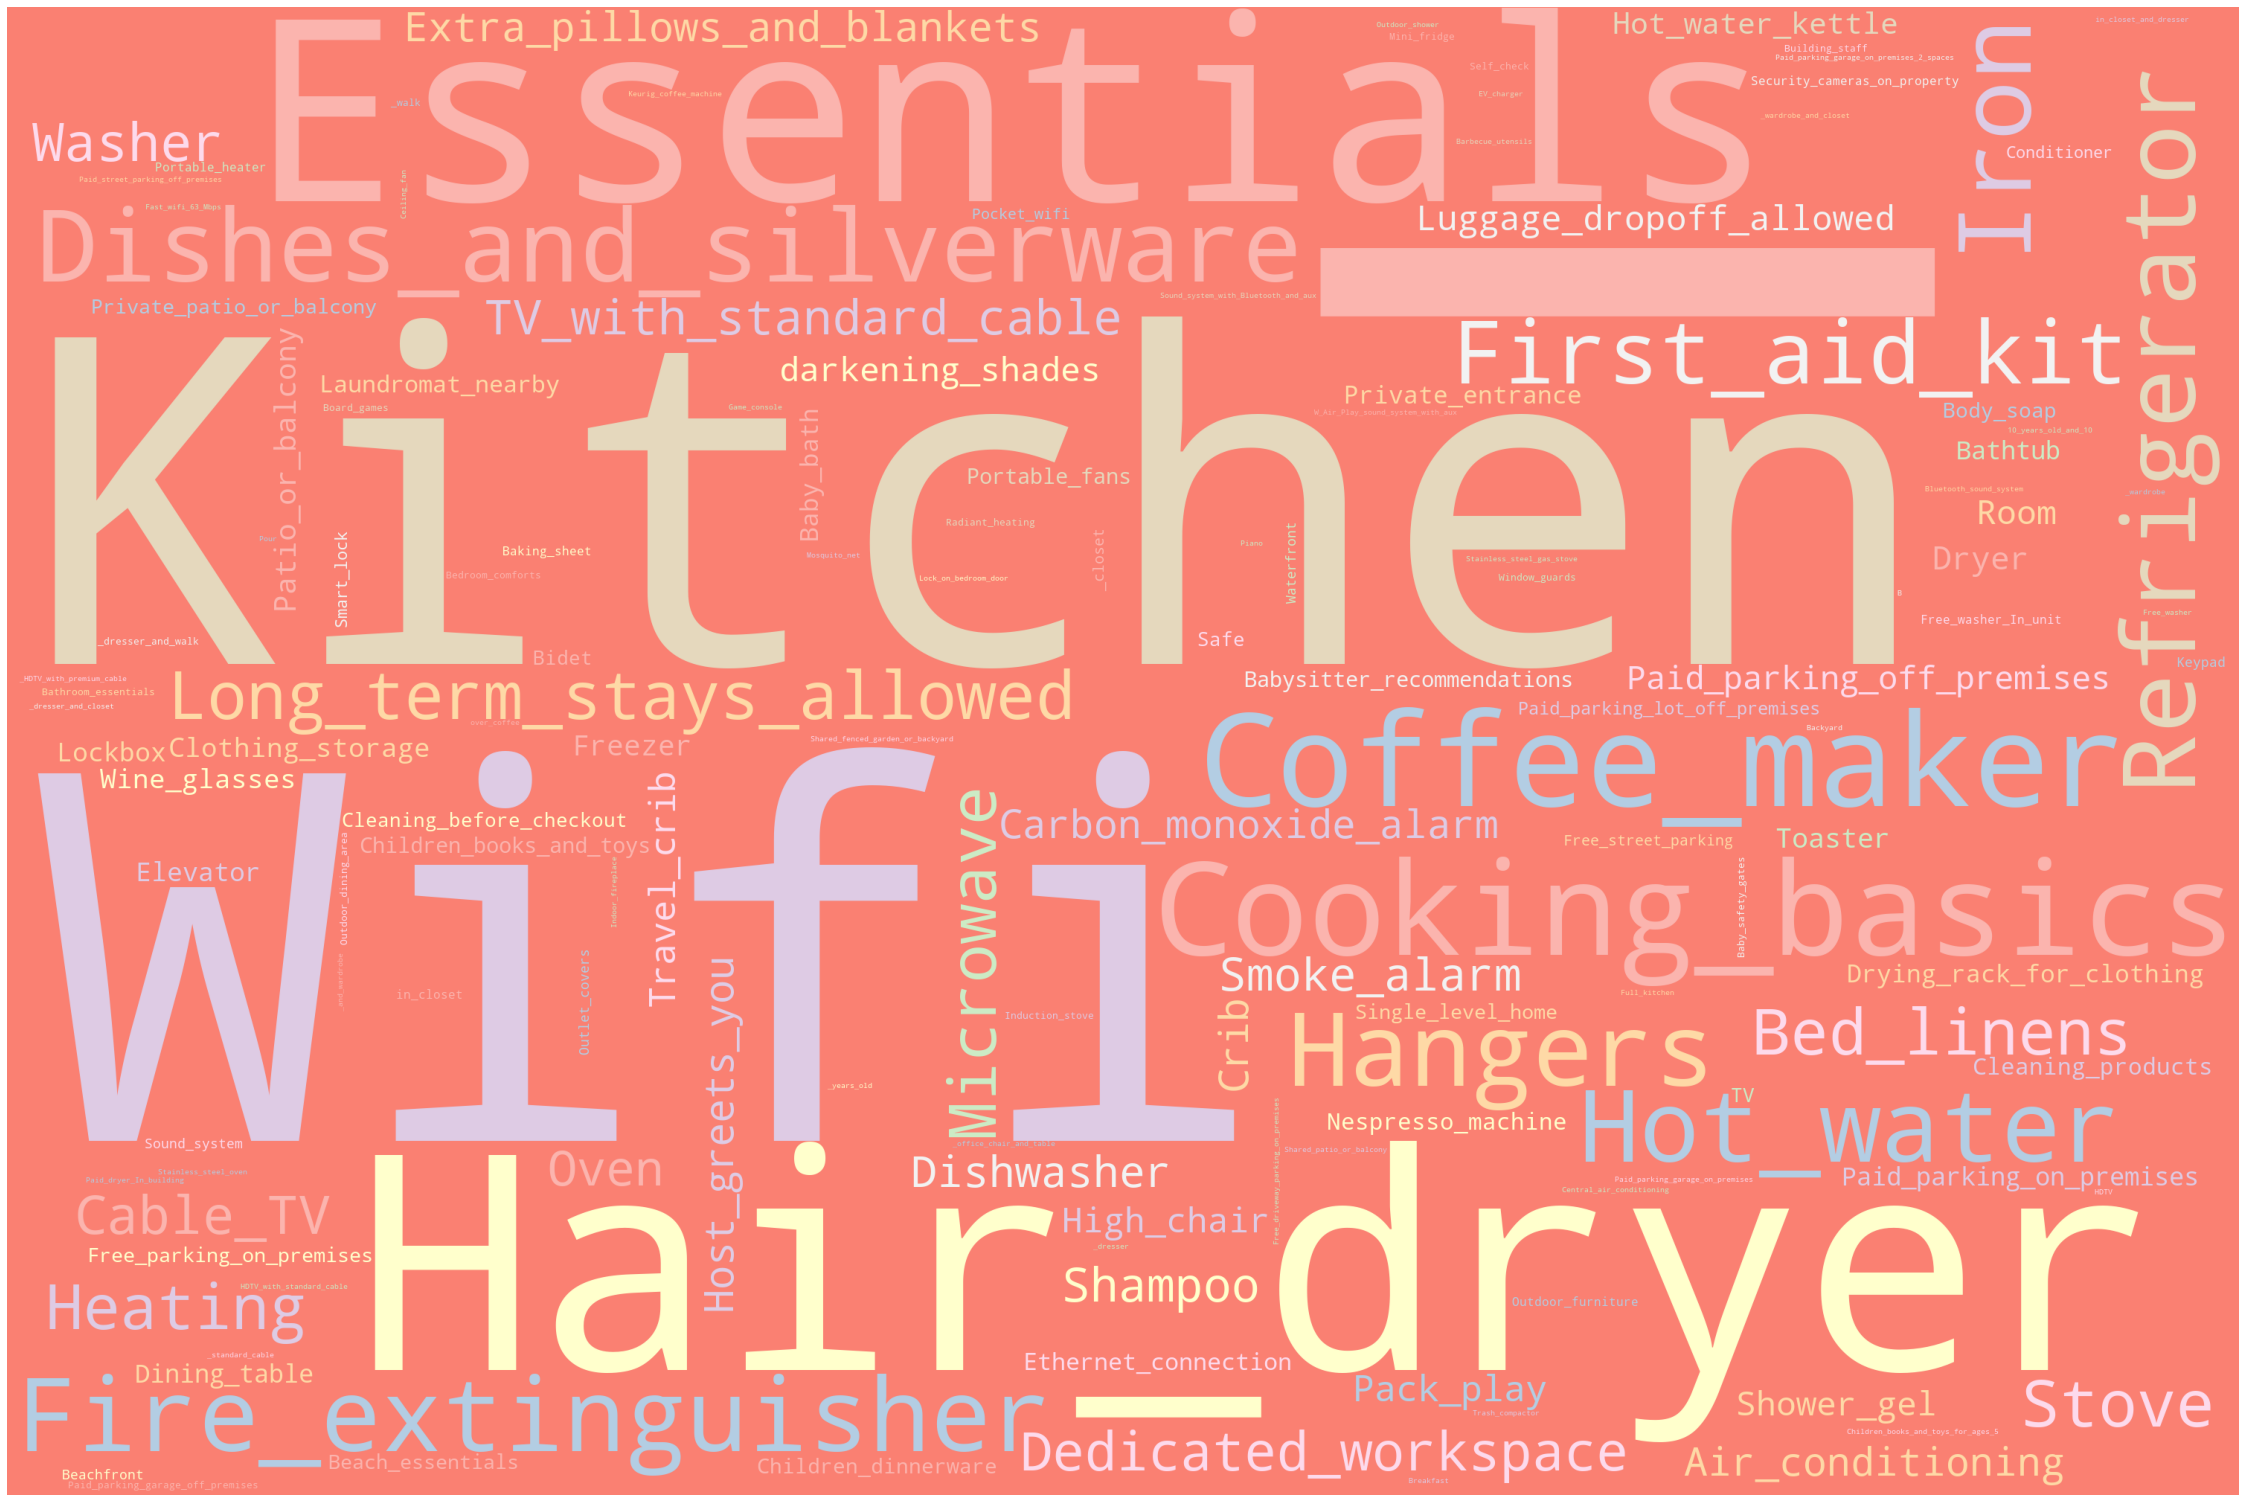

In [22]:
#super_host['amenities'] = super_host['amenities'].str.replace(' ','_') 

#f = open("text.txt", mode = "w")
#f.write(super_host[super_host['amenities']])
#f.close

# Download text file for this to work: 'https://github.com/MrJay7/PDS/raw/main/text.txt'

f=open('text.txt')
text=f.read()
f.close()

wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(text)
plot_cloud(wordcloud)

# Part 2 - Is Seasonality in price Related with reviews?

### Reading the csv file called "Calendar"

In [23]:
def convert_date(df):
    df = df[~ df.price.isnull()]
    df.date = pd.to_datetime(df.date, format='%Y/%m/%d')
    df['weekday'] = df.date.dt.weekday
    df['month'] = df.date.dt.month
    df['month_name'] = df.date.dt.month_name()
    df['weekday_name'] = df.date.dt.day_name()
    return df

In [24]:
df_train = calendar

#Droping some non important variables
df_train.drop(['listing_id','available','adjusted_price','minimum_nights','maximum_nights'], axis=1, inplace=True)

df_train_2 = convert_date(df_train)
df_train_2

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/2619284313.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['weekday'] = df.date.dt.weekday
/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/2619284313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer

date    price  weekday  month month_name weekday_name
0       2021-12-10   $63.00        4     12   December       Friday
1       2021-12-10   $40.00        4     12   December       Friday
2       2021-12-11   $40.00        5     12   December     Saturday
3       2021-12-12   $40.00        6     12   December       Sunday
4       2021-12-13   $40.00        0     12   December       Monday
...            ...      ...      ...    ...        ...          ...
6762432 2022-12-04  $185.00        6     12   December       Sunday
6762433 2022-12-05  $185.00        0     12   December       Monday
6762434 2022-12-06  $185.00        1     12   December      Tuesday
6762435 2022-12-07  $185.00        2     12   December    Wednesday
6762436 2022-12-08  $185.00        3     12   December     Thursday

[6762432 rows x 6 columns]

In [25]:
#Taking the "$" symbol out
df_train_2['price']=df_train_2['price'].str.replace('$','')
df_train_2['price']=pd.to_numeric(df_train_2['price'],errors='coerce')

/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/42000587.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_train_2['price']=df_train_2['price'].str.replace('$','')
/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/42000587.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_2['price']=df_train_2['price'].str.replace('$','')
/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/42000587.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

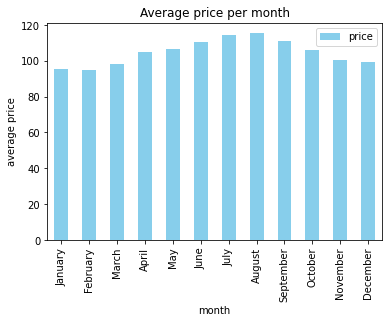

In [26]:
# Ploting average price per month
ax = df_train_2.groupby(['month','month_name']) \
                    .agg({'price': np.mean}).reset_index() \
                    .sort_values(by=['month']).plot.bar(x='month_name', 
                                                        y='price', 
                                                        color='skyblue', 
                                                        title='Average price per month')
ax.set_xlabel('month')
ax.set_ylabel('average price')
ax.legend().set_visible(True)

## Sentiment Analysis

In [27]:
df_reviews = reviews[['listing_id', 'date', 'comments']]

In [28]:
#Changing the types to Strings
df_reviews['comments'] = df_reviews['comments'].astype(str)

/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/108874590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['comments'] = df_reviews['comments'].astype(str)


In [29]:
#Sentiment analysis
col1=[]
col2=[]
col3=[]
col4=[]
vader=SentimentIntensityAnalyzer()
for i in df_reviews['comments']:
    a = vader.polarity_scores(i)
    col1.append(a['neg'])
    col2.append(a['neu'])
    col3.append(a['pos'])
    if a['neu']<= 0.9:  
        if a['neg']>a['pos']:
            col4.append(0)
        else:
            col4.append(1)
    else:
        col4.append(float('NaN'))
    
    
    

df_reviews['neg'] = col1
df_reviews['neu'] = col2
df_reviews['pos'] = col3
df_reviews['Rating'] = col4

/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/667219213.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['neg'] = col1
/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/667219213.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews['neu'] = col2


In [30]:
#Drop all the rows that contain "NaN values" (in column Rating)
df_reviews = df_reviews.dropna( how = 'all', subset = ['Rating'])

In [31]:
#Create 2 additional columns that tell us the month (so we can plot it monthly based)
def convert_date(df):
    df = df[~ df.Rating.isnull()]
    df.date = pd.to_datetime(df.date, format='%Y/%m/%d')
    df['month'] = df.date.dt.month
    df['month_name'] = df.date.dt.month_name()
    return df

In [32]:
df_reviews2 = convert_date(df_reviews)

# display few listings
df_reviews2

listing_id       date  \
3             6499 2015-07-11   
5             6499 2017-03-31   
6             6499 2017-04-30   
7             6499 2017-06-17   
9             6499 2019-05-21   
...            ...        ...   
888606    53396942 2021-12-01   
888607    53409215 2021-11-22   
888608    53409215 2021-11-28   
888611    53487620 2021-11-26   
888612    53491572 2021-12-07   

                                                 comments  neg  neu  pos  \
3       Superbe quartier très proche du tram et du tra... 0.00 0.87 0.13   
5       We had a great time in Lisbon. Bruno's apartme... 0.00 0.66 0.34   
6       Bruno is an excellent host! We loved our stay!... 0.00 0.50 0.50   
7       I thoroughly enjoyed my stay in Lisbon and in ... 0.02 0.78 0.20   
9       I really enjoyed staying at Bruno's place. It ... 0.02 0.76 0.22   
...                                                   ...  ...  ...  ...   
888606  Great location and easy communication with the... 0.00 0.65 0.35   
888607  Amazing flat, amazing hosts, amazing value ! T... 0.00 0.42 0.58   
888608  Good location and clean house. The communicati... 0.00 0.64 0.36   
888611  Eine sehr tolle Unterkunft. Kann ich nur weite... 0.00 0.88 0.12   
888612  I had a great experience staying at Carla's ap... 0.00 0.77 0.23   

        Rating  month month_name  
3         1.00      7       July  
5         1.00      3      March  
6         1.00      4      April  
7         1.00      6       June  
9         1.00      5        May  
...        ...    ...        ...  
888606    1.00     12   December  
888607    1.00     11   November  
888608    1.00     11   November  
888611    1.00     11   November  
888612    1.00     12   December  

[629827 rows x 9 columns]

### Ploting average Positive comments per month

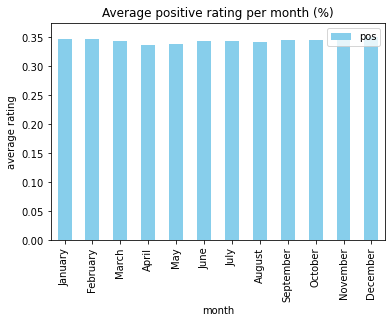

In [33]:
df_positives=df_reviews2[df_reviews2.Rating==1]



ax = df_positives.groupby(['month','month_name']) \
                    .agg({'pos': np.mean}).reset_index() \
                    .sort_values(by=['month']).plot.bar(x='month_name', 
                                                        y='pos', 
                                                        color='skyblue', 
                                                        title='Average positive rating per month (%)')


ax.set_xlabel('month')
ax.set_ylabel('average rating')
ax.legend().set_visible(True)

### Ploting average Negatives comments per month

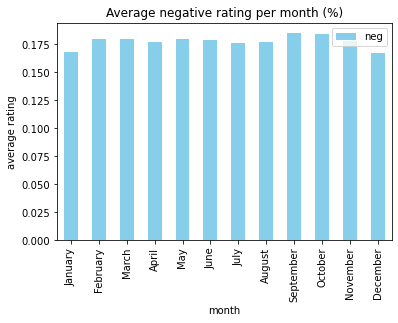

In [34]:
df_positives=df_reviews2[df_reviews2.Rating==0]



ax = df_positives.groupby(['month','month_name']) \
                    .agg({'neg': np.mean}).reset_index() \
                    .sort_values(by=['month']).plot.bar(x='month_name', 
                                                        y='neg', 
                                                        color='skyblue', 
                                                        title='Average negative rating per month (%)')


ax.set_xlabel('month')
ax.set_ylabel('average rating')
ax.legend().set_visible(True)

### Ploting average Neutral comments per month

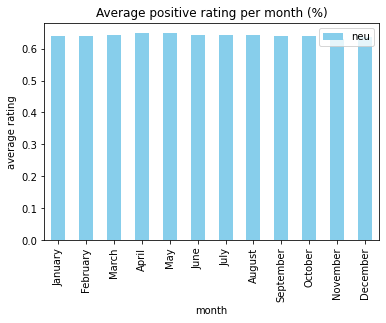

In [35]:
df_positives=df_reviews2[df_reviews2.Rating==1]



ax = df_positives.groupby(['month','month_name']) \
                    .agg({'neu': np.mean}).reset_index() \
                    .sort_values(by=['month']).plot.bar(x='month_name', 
                                                        y='neu', 
                                                        color='skyblue', 
                                                        title='Average positive rating per month (%)')


ax.set_xlabel('month')
ax.set_ylabel('average rating')
ax.legend().set_visible(True)

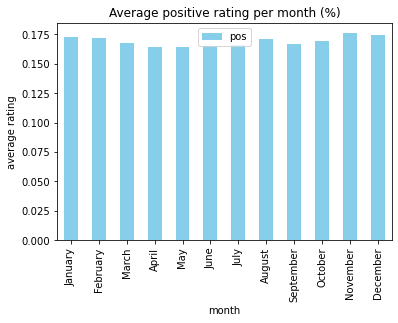

In [36]:
# Ploting average Positive comments per month

df_positives=df_reviews2[df_reviews2.Rating==1]



ax = df_positives.groupby(['month','month_name']) \
                    .agg({'pos': np.std}).reset_index() \
                    .sort_values(by=['month']).plot.bar(x='month_name', 
                                                        y='pos', 
                                                        color='skyblue', 
                                                        title='Average positive rating per month (%)')


ax.set_xlabel('month')
ax.set_ylabel('average rating')
ax.legend().set_visible(True)

# Part 3 - The impact of Events on Reviews

In [37]:
events_vs_reviews = events_vs_reviews.iloc[:,[0,1]]

In [38]:
events_vs_reviews.isnull().sum()

date           0
Events    758395
dtype: int64

In [39]:
events_vs_reviews = events_vs_reviews.dropna()
events_vs_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130224 entries, 0 to 875177
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    130224 non-null  object
 1   Events  130224 non-null  object
dtypes: object(2)
memory usage: 3.0+ MB


In [40]:
events_vs_reviews['date'] = pd.to_datetime(events_vs_reviews['date'])

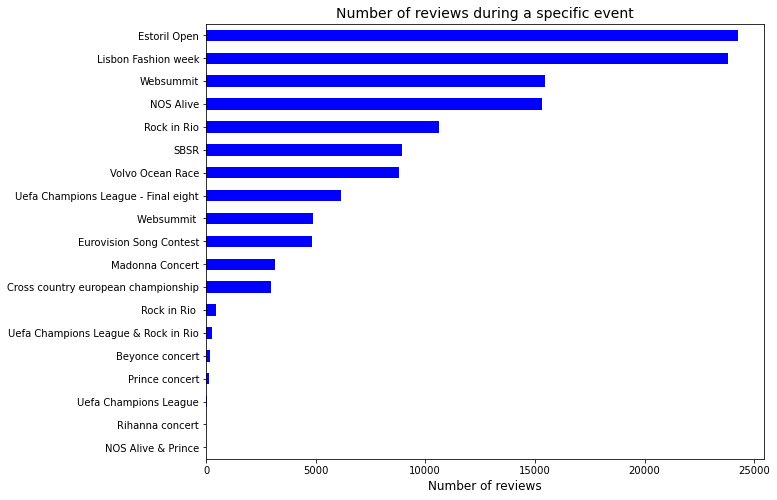

In [41]:
#Seeing which events comprise more times for airbnb reviews
feq = events_vs_reviews['Events'].value_counts().sort_values(ascending=True)
feq = feq[-25:]
feq.plot.barh(figsize=(10,8), color ='b', width= 0.5)
plt.title('Number of reviews during a specific event', fontsize=14)
plt.xlabel('Number of reviews', fontsize = 12)
plt.show()

In [42]:
events_vs_reviews['Events'].value_counts()
#the number of reviews received during or few days after the event

Estoril Open                           24242
Lisbon Fashion week                    23822
Websummit                              15459
NOS Alive                              15337
Rock in Rio                            10634
SBSR                                    8957
Volvo Ocean Race                        8789
Uefa Champions League - Final eight     6137
Websummit                               4860
Eurovision Song Contest                 4839
Madonna Concert                         3152
Cross country european championship     2950
Rock in Rio                              430
Uefa Champions League & Rock in Rio      282
Beyonce concert                          167
Prince concert                           126
Uefa Champions League                     33
Rihanna concert                            7
NOS Alive & Prince                         1
Name: Events, dtype: int64

In [43]:
events_vs_reviews['date'].value_counts().head(20)
#It shows which days have got more reviews (during events) - top 20

2019-12-09    1221
2019-07-14    1075
2019-05-05    1035
2018-05-13    1020
2018-05-04    1009
2019-10-06     966
2019-10-07     942
2021-11-01     942
2019-11-08     938
2019-07-15     917
2019-10-05     898
2021-10-03     886
2021-11-07     882
2019-05-04     875
2018-07-15     872
2019-04-28     853
2021-11-05     853
2018-10-07     851
2019-12-08     843
2019-10-01     839
Name: date, dtype: int64

### 2. Another graph 

Text(0, 0.5, 'Number of Reviews')

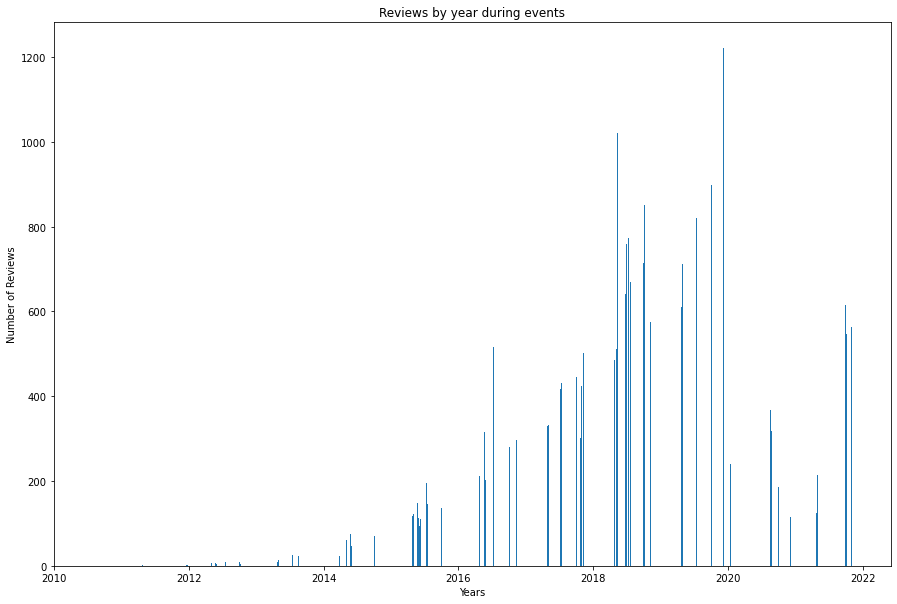

In [44]:
# create a figure and axis 
fig, ax = plt.subplots(figsize=(15,10)) 
# count the occurrence of each class 
data = events_vs_reviews['date'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Reviews by year during events') 
ax.set_xlabel('Years') 
ax.set_ylabel('Number of Reviews')

#It shows in which years there were more reviews (having at the same time - events)

In [45]:
events_vs_reviews

date              Events
0      2010-07-24  NOS Alive & Prince
19     2011-04-25        Estoril Open
20     2011-04-26        Estoril Open
21     2011-05-01        Estoril Open
22     2011-05-02        Estoril Open
...           ...                 ...
875173 2021-11-08           Websummit
875174 2021-11-08           Websummit
875175 2021-11-08           Websummit
875176 2021-11-08           Websummit
875177 2021-11-08           Websummit

[130224 rows x 2 columns]

### 3. It shows in which year occur each event (good table to show, just to know)

In [46]:
events_vs_reviews['Year'] = events_vs_reviews['date'].dt.year
# splitt the date in Year to facilitate the work

groups = events_vs_reviews.groupby('Events')['Year'].unique()
  
groups

#It shows in which year occur the event

Events
Beyonce concert                                                                   [2014]
Cross country european championship                                               [2019]
Estoril Open                           [2011, 2012, 2013, 2014, 2015, 2016, 2017, 201...
Eurovision Song Contest                                                           [2018]
Lisbon Fashion week                    [2011, 2012, 2013, 2014, 2015, 2016, 2017, 201...
Madonna Concert                                                                   [2020]
NOS Alive                              [2011, 2012, 2013, 2014, 2015, 2016, 2017, 201...
NOS Alive & Prince                                                                [2010]
Prince concert                                                                    [2013]
Rihanna concert                                                                   [2011]
Rock in Rio                                                           [2012, 2016, 2018]
Rock in Rio   

### 4. Good graph showing in which year there are more reviews (during events)

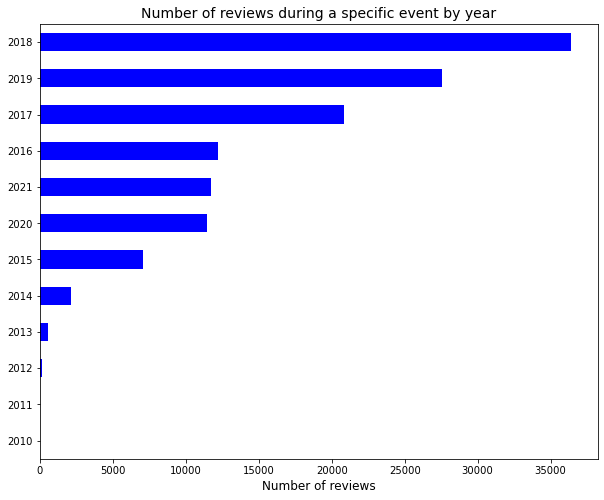

In [47]:
feq = events_vs_reviews['Year'].value_counts().sort_values(ascending=True)
feq = feq[-15:]
feq.plot.barh(figsize=(10,8), color ='b', width= 0.5)
plt.title('Number of reviews during a specific event by year', fontsize=14)
plt.xlabel('Number of reviews', fontsize = 12)
plt.show()

#It shows in which year was more reviews (during events)

In [48]:
events_vs_reviews['Year'].value_counts()
#It shows which years have got more reviews (during events)

2018    36400
2019    27551
2017    20851
2016    12234
2021    11720
2020    11454
2015     7074
2014     2157
2013      582
2012      175
2011       25
2010        1
Name: Year, dtype: int64

In [49]:
reviews

listing_id                  id        date  reviewer_id reviewer_name  \
0             6499            18879225  2014-09-02     17027029        Simone   
1             6499            21074122  2014-10-11      7661611       Cláudio   
2             6499            24704004  2015-01-02     20348870       Rodrigo   
3             6499            37894945  2015-07-11     34762351      Blandine   
4             6499            41672462  2015-08-08     39438424       Mirjana   
...            ...                 ...         ...          ...           ...   
888608    53409215  505585213464000192  2021-11-28    407411408        Sanaga   
888609    53414853  506342584800263296  2021-11-29    398278891      Heejoong   
888610    53458315  504113851485003072  2021-11-26     25412098       Suellen   
888611    53487620  504144507695068480  2021-11-26    308750378        Melisa   
888612    53491572  512168913343764480  2021-12-07     20956607          Owen   

                                                 comments  
0       Ola Bruno,_x000D_<br/>_x000D_<br/>Tive um mes ...  
1       Encontramos o apartamento de Bruno exatamente ...  
2       Estivemos em Lisboa por aproximadamente 03 (tr...  
3       Superbe quartier très proche du tram et du tra...  
4       Très bel appartement, bien situé et à proximit...  
...                                                   ...  
888608  Good location and clean house. The communicati...  
888609  정말 완벽한 숙소 에요 호스트분께서 친절하게 설명해 주시고 주변으로 <br/>맛집이...  
888610  Gostei muito da hospedagem, tudo muito limpo, ...  
888611  Eine sehr tolle Unterkunft. Kann ich nur weite...  
888612  I had a great experience staying at Carla's ap...  

[888613 rows x 6 columns]

In [50]:
# Loading another data set (Reviews that have comments and the date they were made)
reviews_detailed = reviews

In [51]:
reviews_detailed['date'] = pd.to_datetime(reviews_detailed['date'])
reviews_updated = reviews_detailed.drop(labels=['id','reviewer_name','comments','listing_id'], axis=1)
reviews_updated['Year'] = reviews_updated['date'].dt.year
reviews_updated

date  reviewer_id  Year
0      2014-09-02     17027029  2014
1      2014-10-11      7661611  2014
2      2015-01-02     20348870  2015
3      2015-07-11     34762351  2015
4      2015-08-08     39438424  2015
...           ...          ...   ...
888608 2021-11-28    407411408  2021
888609 2021-11-29    398278891  2021
888610 2021-11-26     25412098  2021
888611 2021-11-26    308750378  2021
888612 2021-12-07     20956607  2021

[888613 rows x 3 columns]

### 5. Similar graph as one of the previous, to see in which year there are more reviews (overall)

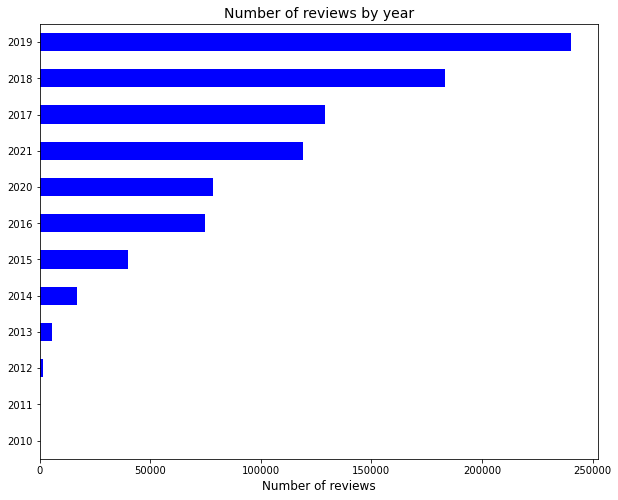

In [52]:
feq = reviews_updated['Year'].value_counts().sort_values(ascending=True)
feq = feq[-15:]
feq.plot.barh(figsize=(10,8), color ='b', width= 0.5)
plt.title('Number of reviews by year', fontsize=14)
plt.xlabel('Number of reviews', fontsize = 12)
plt.show()

#It shows in which year was more reviews

In [53]:
reviews_updated['Year'].value_counts()
#It shows which years have got more reviews

2019    240267
2018    183222
2017    128828
2021    118997
2020     78422
2016     74596
2015     40115
2014     16754
2013      5687
2012      1510
2011       211
2010         4
Name: Year, dtype: int64

In [54]:
# Load another data set
events_vs_reviews1.dropna()
events_vs_reviews1['date'] = pd.to_datetime(events_vs_reviews1['date'])
events_vs_reviews1['Year'] = events_vs_reviews1['date'].dt.year
events_vs_reviews1

date  listing_id              Events  Year
0      2010-07-24       29915  NOS Alive & Prince  2010
1      2010-09-05       29915                 NaN  2010
2      2010-09-15       29915                 NaN  2010
3      2010-12-06       29915                 NaN  2010
4      2011-01-01       29248                 NaN  2011
...           ...         ...                 ...   ...
888614 2021-12-09    40707720                 NaN  2021
888615 2021-12-09    45200079                 NaN  2021
888616 2021-12-09    46088655                 NaN  2021
888617 2021-12-09    47595149                 NaN  2021
888618 2021-12-09    48348757                 NaN  2021

[888619 rows x 4 columns]

In [55]:
# First you must run the data set events_vs_reviews1 that is a lit bit below
U = pd.DataFrame(events_vs_reviews1.groupby(['Year'])['listing_id'].count())
U

#this is an important table showing the number of reviews (overall) by year
#I do this to prepare the plots

listing_id
Year            
2010           4
2011         211
2012        1510
2013        5687
2014       16754
2015       40115
2016       74597
2017      128829
2018      183223
2019      240269
2020       78422
2021      118998

In [56]:
w = reviews_updated['Year'].value_counts().sort_index()
w

#same stuff as above

2010         4
2011       211
2012      1510
2013      5687
2014     16754
2015     40115
2016     74596
2017    128828
2018    183222
2019    240267
2020     78422
2021    118997
Name: Year, dtype: int64

Text(0.5, 1.0, 'Evolution of the number of reviews over time')

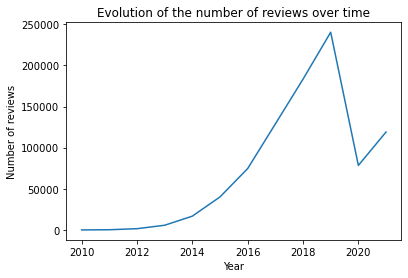

In [57]:
w.plot()
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title("Evolution of the number of reviews over time")
#It's a line plot showing the evoluting of reviews during the time (overall reviews)

In [58]:
y = reviews_updated['date'].value_counts().sort_index()
y

#count of reviews by day

2010-07-24      1
2010-09-05      1
2010-09-15      1
2010-12-06      1
2011-01-01      1
             ... 
2021-12-05    278
2021-12-06    266
2021-12-07    187
2021-12-08    160
2021-12-09      9
Name: date, Length: 3715, dtype: int64

<AxesSubplot:>

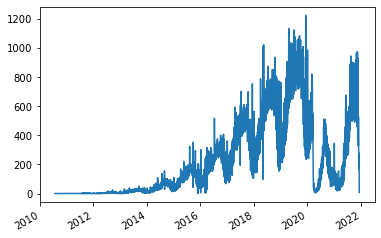

In [59]:
y.plot()
#evolution of the reviews by day
#it's an important graph to have an idea but it looks not a good visualization to show

In [60]:
#------------------------------------

In [61]:
R = pd.DataFrame(events_vs_reviews1.groupby(['Year', 'Events'])['Events'].count())
R

#table just to organize by year and by event, the last collumn refers to how many reviews a certain event received (e.g: Estoril Open in 2011 it has 6)

Events
Year Events                                     
2010 NOS Alive & Prince                        1
2011 Estoril Open                              6
     Lisbon Fashion week                       8
     NOS Alive                                 4
     Rihanna concert                           7
2012 Estoril Open                             30
     Lisbon Fashion week                      53
     NOS Alive                                45
     Rock in Rio                              47
2013 Estoril Open                            112
     Lisbon Fashion week                     169
     NOS Alive                               175
     Prince concert                          126
2014 Beyonce concert                         167
     Estoril Open                            445
     Lisbon Fashion week                     520
     NOS Alive                               280
     Rock in Rio                             430
     Uefa Champions League                    33
     Uefa Champions League & Rock in Rio     282
2015 Estoril Open                           1226
     Lisbon Fashion week                    1082
     NOS Alive                               859
     SBSR                                    762
     Volvo Ocean Race                       3145
2016 Estoril Open                           2196
     Lisbon Fashion week                    2098
     NOS Alive                              1536
     Rock in Rio                            2953
     SBSR                                   1492
     Websummit                              1959
2017 Estoril Open                           4145
     Lisbon Fashion week                    3309
     NOS Alive                              2428
     SBSR                                   2728
     Volvo Ocean Race                       5644
     Websummit                              2597
2018 Estoril Open                           5954
     Eurovision Song Contest                4839
     Lisbon Fashion week                    4625
     NOS Alive                              4913
     Rock in Rio                            7634
     SBSR                                   3975
     Websummit                              4460
2019 Cross country european championship    2950
     Estoril Open                           8717
     Lisbon Fashion week                    5927
     NOS Alive                              5097
     Websummit                              4860
2020 Lisbon Fashion week                    1596
     Madonna Concert                        3152
     Uefa Champions League - Final eight    6137
     Websummit                               569
2021 Estoril Open                           1411
     Lisbon Fashion week                    4435
     Websummit                              5874

In [62]:
I = pd.DataFrame(events_vs_reviews1.groupby(['Year'])['Events'].count())
I

#Table that shows the number of reviews by year (during events)

Events
Year        
2010       1
2011      25
2012     175
2013     582
2014    2157
2015    7074
2016   12234
2017   20851
2018   36400
2019   27551
2020   11454
2021   11720

### 6. Line plot to see the evolution of reviews (during events) over time

Text(0.5, 1.0, 'Evolution of the reviews (during events) over time')

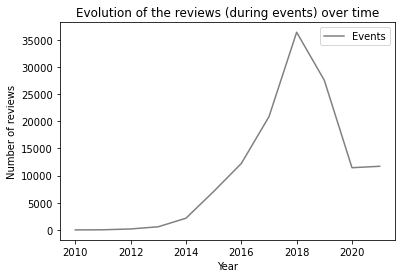

In [63]:
I.plot(color='grey')
plt.ylabel('Number of reviews')
plt.title('Evolution of the reviews (during events) over time')

### 7. Line Plot of the two variables (Reviews and Events)

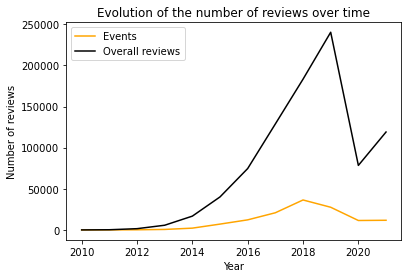

In [64]:
I.plot(color='orange')
plt.ylabel('Number of reviews')
plt.title('Evolution of the reviews (during events) over time')

w.plot(color='black',label='Overall reviews')
plt.xlabel('Year')
plt.ylabel('Number of reviews')
plt.title("Evolution of the number of reviews over time")
plt.legend(loc="upper left")

#We can have an idea about the reviews behaviour with the two graphs

### 8. I had a similar graph above (I prefer the first one)

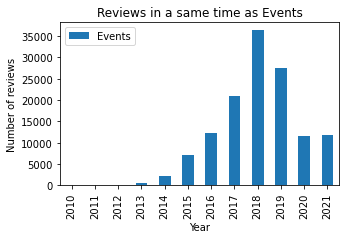

In [65]:
# plot grouped bar chart
I.plot(kind='bar',title='Reviews in a same time as Events',figsize=(5,3))
plt.ylabel('Number of reviews')
plt.legend(loc="upper left")

#individual Bar plot for Reviews during events

### 9. Now the same idea but for overall reviews

<AxesSubplot:title={'center':'Overall Reviews'}, xlabel='Year', ylabel='Number of reviews'>

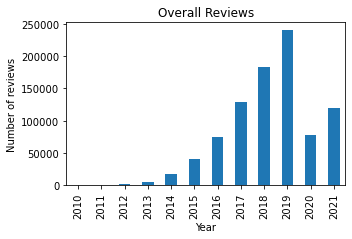

In [66]:
plt.ylabel('Number of reviews')
plt.xlabel('Year')

w.plot(kind='bar',title='Overall Reviews',figsize=(5,3))

#individual Bar plot for Overall Reviews

### 10. For the bar plot grouped

In [67]:
Z = pd.concat([U, I], axis=1)
Z

#a time that help to any graph we want (now with numerical values its easier)
#note: listing id refers to overall reviews and events to reviews during events periods.

listing_id  Events
Year                    
2010           4       1
2011         211      25
2012        1510     175
2013        5687     582
2014       16754    2157
2015       40115    7074
2016       74597   12234
2017      128829   20851
2018      183223   36400
2019      240269   27551
2020       78422   11454
2021      118998   11720

In [68]:
Z['listing_id']

Year
2010         4
2011       211
2012      1510
2013      5687
2014     16754
2015     40115
2016     74597
2017    128829
2018    183223
2019    240269
2020     78422
2021    118998
Name: listing_id, dtype: int64

In [69]:
Z.corr()
#correlation coefficient of +1 indicates a perfect positive correlation. As variable x increases, variable y increases

#Important note to see: Strong correlation between our variables (Events and reviews)...lets see if they are significant

listing_id  Events
listing_id        1.00    0.94
Events            0.94    1.00

In [70]:
y = Z.listing_id  # response
X = Z.Events      # predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor
results = sm.OLS(endog=y, exog=X).fit()
print(results.summary())

#observing the output : pvalue<0.05 (strong significant)

                            OLS Regression Results                            
Dep. Variable:             listing_id   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     74.14
Date:                Fri, 13 May 2022   Prob (F-statistic):           6.15e-06
Time:                        00:57:09   Log-Likelihood:                -139.16
No. Observations:                  12   AIC:                             282.3
Df Residuals:                      10   BIC:                             283.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6275.3003   1.15e+04      0.548      0.5

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


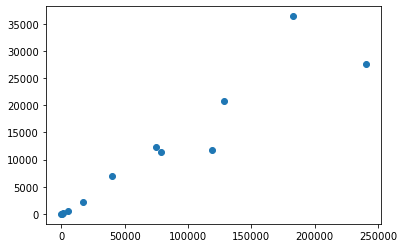

In [71]:
plt.scatter(U, I)
plt.show()
#Use a scatter plot to determine whether or not two variables have a relationship or correlation.
#helps to see the strong correlation between the variables

### 11. Another visualization (Bar chart grouped) to see the count of overall reviews and reviews during events

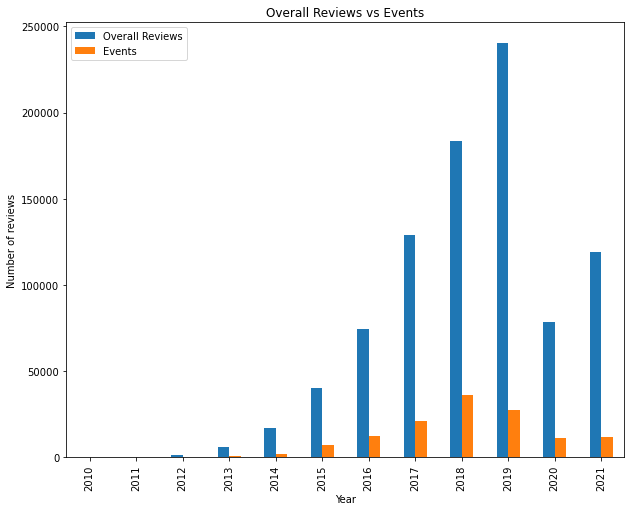

In [72]:
Z.plot(kind='bar',title='Overall Reviews vs Events',figsize=(10,8))
plt.ylabel('Number of reviews')
plt.legend(["Overall Reviews", "Events"],loc="upper left")

#Bar plot grouped for the two variables

### 12. Area stackplot

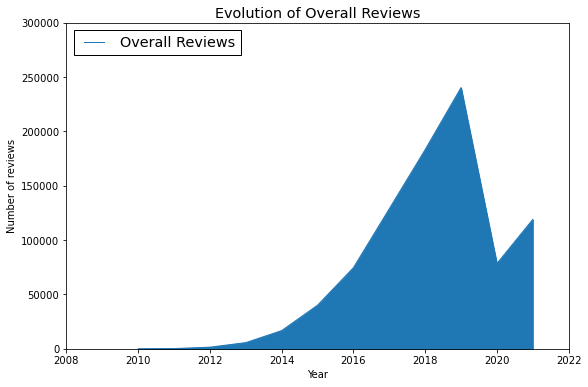

In [73]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.style.use('classic')
U.plot.area(ax=ax)
plt.ylabel('Number of reviews')
plt.title('Evolution of Overall Reviews')
plt.legend(["Overall Reviews"],loc="upper left")

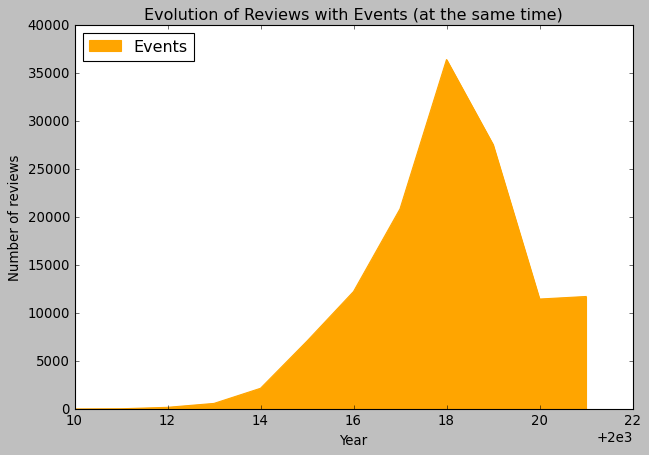

In [74]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.style.use('classic')
I.plot.area(ax=ax, color='orange')
plt.ylabel('Number of reviews')
plt.title('Evolution of Reviews with Events (at the same time)')
plt.legend(loc="upper left")

### 13. Area chart grouped

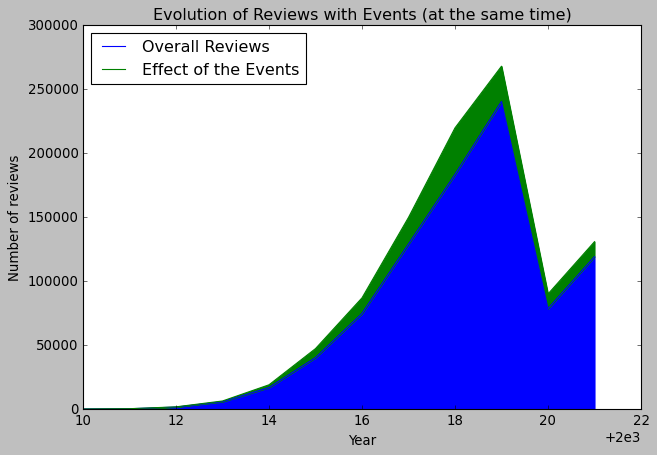

In [75]:
fig, ax = plt.subplots(figsize=(9, 6))
plt.style.use('classic')
Z.plot.area(ax=ax)
plt.ylabel('Number of reviews')
plt.title('Evolution of Reviews with Events (at the same time)')
#plt.legend(loc="upper left")
plt.legend(["Overall Reviews","Effect of the Events"],loc="upper left")

#The idea behind is that the green shows the small "sum" of reviews events in the overall situation

In [76]:
UU = U.values.tolist()
II=I.values.tolist()
Years = events_vs_reviews1['Year'].values.tolist()
x=np.array(Years)

### 11. If we look to the line plot (for example : first graph, we dont see any seasonality)
the professor doesn't consider important regarding this : Residuals, Arima and Prediction

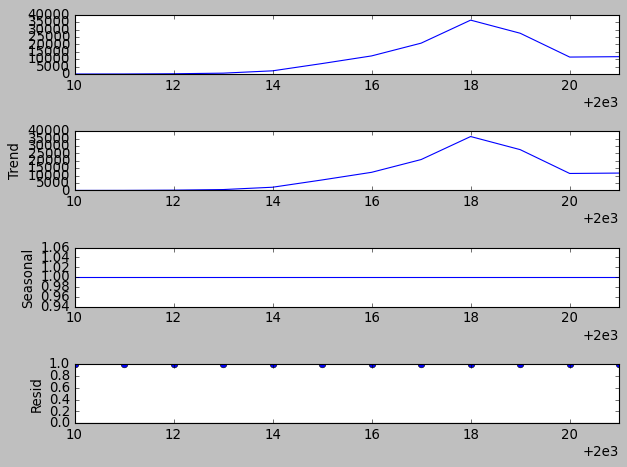

In [77]:
result = tsa.seasonal_decompose(I, model='multiplicative', period = 1)
figure=result.plot()

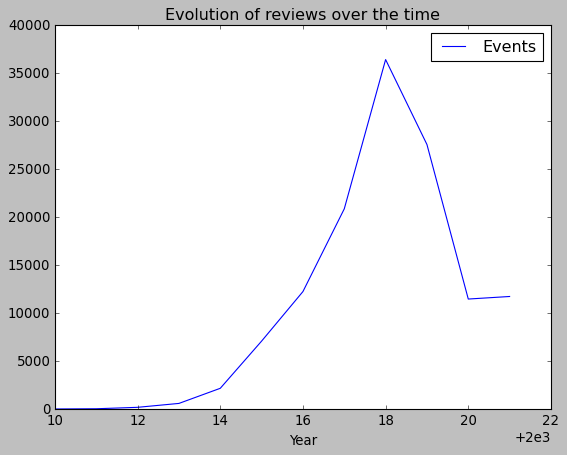

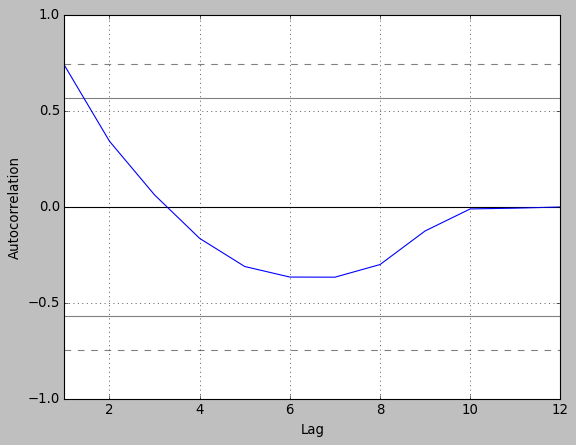

In [78]:
#another graph that can be useful
I.plot(title='Evolution of reviews over the time')
plt.show()


autocorrelation_plot(I) #or autocorrelation_plot(reviews_detailed1, lags='a certain value')
plt.show()

### Extras: interesting graph !

Text(0, 0.5, 'Number of Reviews')

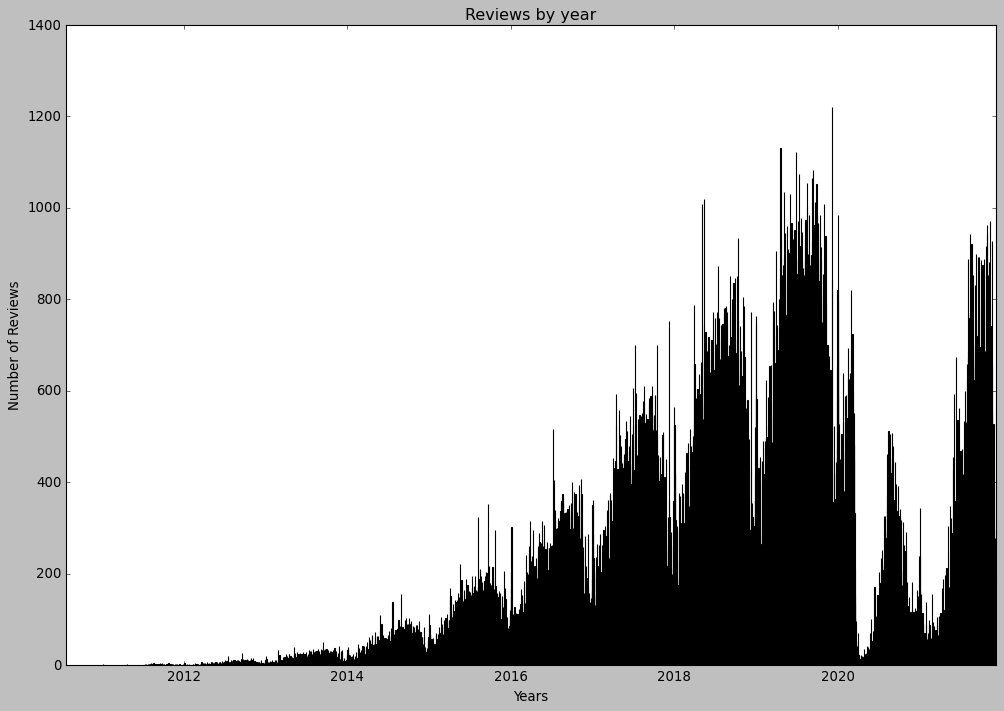

In [79]:
# create a figure and axis 
fig, ax = plt.subplots(figsize=(15,10)) 
# count the occurrence of each class 
data = reviews_detailed['date'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
# set title and labels 
ax.set_title('Reviews by year') 
ax.set_xlabel('Years') 
ax.set_ylabel('Number of Reviews')

#Evolution of the reviews during the time interval
#A bar chart is used when you want to show a distribution of data points or perform a comparison of metric values across different subgroups of your data. From a bar chart, we can see which groups are highest or most common, and how other groups compare against the others.
#In this case allow us to have a better overview of the evolution during that time.

# Part 4 - The effect of reviews on the 30 day availability

## Selecting the columns needed

In [80]:
lis_list = listings[["id",
                    "neighbourhood_cleansed",
                    "price",
                    "availability_30",
                    "number_of_reviews",
                    "review_scores_rating",
                    "review_scores_location",
                    "reviews_per_month"
                    ]]

## Creating heat map of the average Review Score per area

In [81]:
loc_rev = listings[["neighbourhood_cleansed",
                   "review_scores_rating",
                    "number_of_reviews"]]
loc_rev = loc_rev.rename(columns = {'neighbourhood_cleansed':'neighbourhood'})
loc_rev = loc_rev.dropna()
loc_rev = loc_rev.groupby(["neighbourhood"]).agg({'review_scores_rating':'mean', 'number_of_reviews':'sum'})

In [82]:
lis_geo = geo_neighb
lis_geo = lis_geo.dissolve(["neighbourhood"])
lis_geo_rev = lis_geo.merge(loc_rev, on='neighbourhood')
lis_geo_rev.sort_values(by=['review_scores_rating'], inplace = True, ascending=False)
lis_geo_rev.head(30)

geometry  \
neighbourhood                                                                                        
Alguber                                          POLYGON ((-8.99449 39.29669, -8.99418 39.29668...   
Sapataria                                        POLYGON ((-9.19285 38.99206, -9.19295 38.99205...   
Vermelha                                         POLYGON ((-9.06770 39.28413, -9.06782 39.28414...   
Arruda dos Vinhos                                POLYGON ((-9.04675 39.02514, -9.04661 39.02500...   
Malveira e So Miguel de Alcaina                  POLYGON ((-9.24939 38.94482, -9.24938 38.94474...   
Miragaia e Marteleira                            POLYGON ((-9.24119 39.21567, -9.24124 39.21566...   
Castanheira do Ribatejo e Cachoeiras             POLYGON ((-8.98148 39.01329, -8.98152 39.01337...   
Meca                                             POLYGON ((-9.01769 39.10092, -9.01752 39.10094...   
Lousa                                            POLYGON ((-9.20064 38.91021, -9.20064 38.91021...   
Maxial e Monte Redondo                           POLYGON ((-9.13591 39.13205, -9.13604 39.13193...   
Cardosas                                         POLYGON ((-9.02441 38.98580, -9.02432 38.98567...   
Vilar                                            POLYGON ((-9.10293 39.20575, -9.10284 39.20577...   
Campelos e Outeiro da Cabea                      POLYGON ((-9.17842 39.19783, -9.17826 39.19763...   
Santa Clara                                      POLYGON ((-9.13974 38.78679, -9.13955 38.78641...   
Ribafria e Pereiro de Palhacana                  POLYGON ((-9.05970 39.07906, -9.06007 39.07858...   
Alverca do Ribatejo e Sobralinho                 POLYGON ((-9.04100 38.93580, -9.04093 38.93576...   
Arranh                                           POLYGON ((-9.11038 38.98429, -9.11032 38.98426...   
Enxara do Bispo, Gradil e Vila Franca do Rosrio  POLYGON ((-9.21241 39.01041, -9.21233 39.01026...   
Ramada e Caneas                                  POLYGON ((-9.20318 38.81755, -9.20312 38.81741...   
Alenquer (Santo Estvo e Triana)                  POLYGON ((-8.94693 39.09759, -8.94688 39.09752...   
Agualva e Mira-Sintra                            POLYGON ((-9.30223 38.78850, -9.30212 38.78848...   
Dois Portos e Runa                               POLYGON ((-9.19973 39.08276, -9.19972 39.08253...   
Carvoeira e Carmes                               POLYGON ((-9.16387 39.10630, -9.16375 39.10608...   
Ramalhal                                         POLYGON ((-9.18706 39.19235, -9.18711 39.19199...   
Moita dos Ferreiros                              POLYGON ((-9.22715 39.26470, -9.22700 39.26470...   
Santa Brbara                                     POLYGON ((-9.31500 39.21911, -9.31490 39.21917...   
A dos Cunhados e Maceira                         POLYGON ((-9.32541 39.18987, -9.32533 39.18983...   
Alhandra, So Joo dos Montes e Calhandriz         POLYGON ((-9.01502 38.97634, -9.01524 38.97522...   
Cadaval e Pro Moniz                              POLYGON ((-9.08935 39.25876, -9.08922 39.25867...   
Lamas e Cercal                                   POLYGON ((-8.98387 39.25352, -8.98385 39.25350...   

                                                   neighbourhood_group  \
neighbourhood                                                            
Alguber                                                        Cadaval   
Sapataria                                        Sobral De Monte Agrao   
Vermelha                                                       Cadaval   
Arruda dos Vinhos                                    Arruda Dos Vinhos   
Malveira e So Miguel de Alcaina                                  Mafra   
Miragaia e Marteleira                                          Lourinh   
Castanheira do Ribatejo e Cachoeiras               Vila Franca De Xira   
Meca                                                          Alenquer   
Lousa                                                           Loures   
Maxial e Mo

<AxesSubplot:>

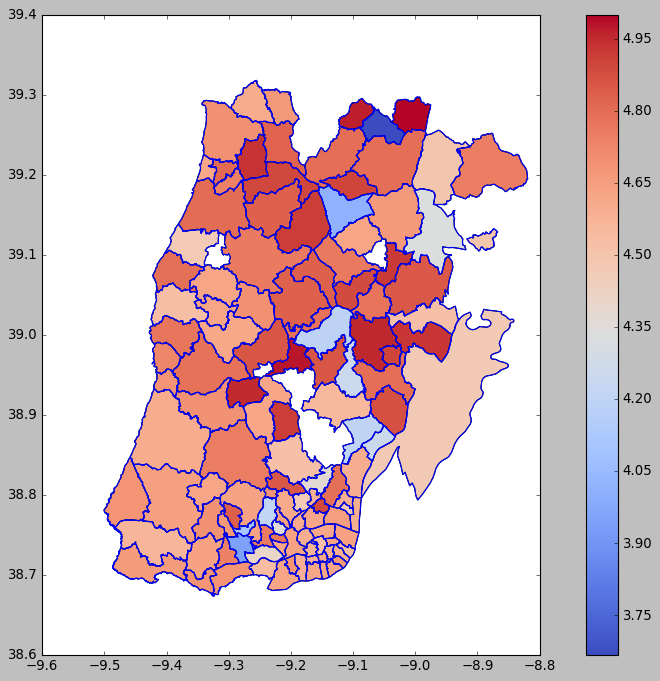

In [83]:
base = lis_geo_rev.boundary.plot(figsize=(15, 10))
lis_geo_rev.plot(ax=base, column='review_scores_rating', cmap='coolwarm', legend=True)

## Creating heat map of the standard deviation of Price per area

In [84]:
loc_price = listings[["neighbourhood_cleansed",
                      "price",
                      "number_of_reviews"]]
loc_price = loc_price.rename(columns = {'neighbourhood_cleansed':'neighbourhood'})

In [85]:
for i in loc_price[['price']]:
    loc_price['price'] = loc_price['price'].str.replace('$', '',)
    loc_price[i] = pd.to_numeric(loc_price[i], errors='coerce')

/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/1005630424.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  loc_price['price'] = loc_price['price'].str.replace('$', '',)


In [86]:
loc_price = loc_price.groupby(["neighbourhood"]).agg({'price':'std', 'number_of_reviews':'sum'})
loc_price = loc_price.dropna()

In [87]:
lis_geo_price = lis_geo.merge(loc_price, on='neighbourhood')
lis_geo_price.sort_values(by=['price'], inplace = True, ascending=False)
lis_geo_price.head(10)

geometry  \
neighbourhood                                                                                        
Freiria                                          POLYGON ((-9.29398 39.03760, -9.29391 39.03755...   
Bucelas                                          POLYGON ((-9.12886 38.93913, -9.12875 38.93903...   
Santa Brbara                                     POLYGON ((-9.31500 39.21911, -9.31490 39.21917...   
Alhandra, So Joo dos Montes e Calhandriz         POLYGON ((-9.01502 38.97634, -9.01524 38.97522...   
Santo Quintino                                   POLYGON ((-9.10429 39.02887, -9.10416 39.02882...   
Enxara do Bispo, Gradil e Vila Franca do Rosrio  POLYGON ((-9.21241 39.01041, -9.21233 39.01026...   
Carnaxide e Queijas                              POLYGON ((-9.25779 38.73185, -9.25772 38.73184...   
Alcabideche                                      MULTIPOLYGON (((-9.47729 38.75420, -9.47727 38...   
Pvoa de Santa Iria e Forte da Casa               POLYGON ((-9.03247 38.87300, -9.03278 38.87223...   
A dos Cunhados e Maceira                         POLYGON ((-9.32541 39.18987, -9.32533 39.18983...   

                                                   neighbourhood_group  price  \
neighbourhood                                                                   
Freiria                                                  Torres Vedras 308.30   
Bucelas                                                         Loures 212.80   
Santa Brbara                                                   Lourinh 203.23   
Alhandra, So Joo dos Montes e Calhandriz           Vila Franca De Xira 194.21   
Santo Quintino                                   Sobral De Monte Agrao 180.02   
Enxara do Bispo, Gradil e Vila Franca do Rosrio                  Mafra 179.44   
Carnaxide e Queijas                                             Oeiras 159.37   
Alcabideche                                                    Cascais 157.80   
Pvoa de Santa Iria e Forte da Casa                 Vila Franca De Xira 144.42   
A dos Cunhados e Maceira                                 Torres Vedras 135.87   

                                                 number_of_reviews  
neighbourhood                                                       
Freiria                                                         20  
Bucelas                                                         84  
Santa Brbara                                                   104  
Alhandra, So Joo dos Montes e Calhandriz                        45  
Santo Quintino                                                  52  
Enxara do Bispo, Gradil e Vila Franca do Rosrio                219  
Carnaxide e Queijas                                            530  
Alcabideche                                                   1656  
Pvoa de Santa Iria e Forte da Casa                              92  
A dos Cunhados e Maceira                                      1039

<AxesSubplot:>

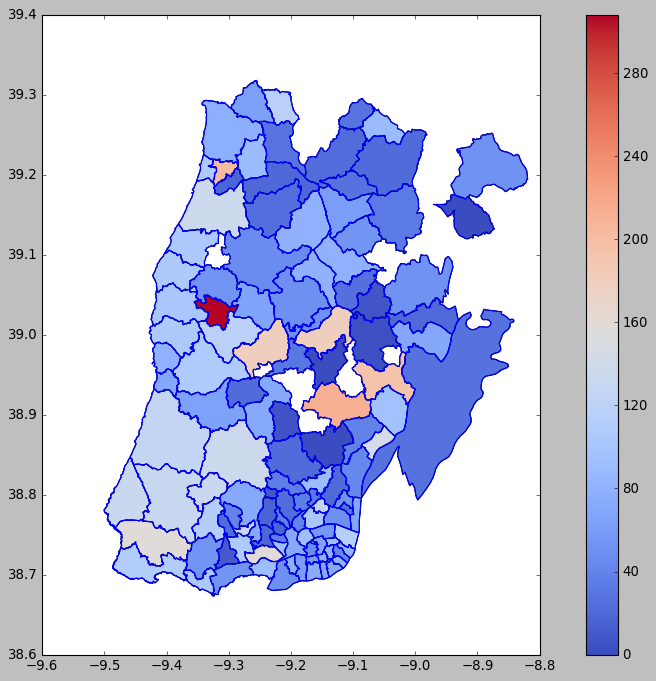

In [88]:
base = lis_geo_price.boundary.plot(figsize=(15, 10))
lis_geo_price.plot(ax=base, column='price', cmap='coolwarm', legend=True)

## Creating heat map of the average Number of Reviews per month per area

In [89]:
loc_qu = listings[["neighbourhood_cleansed",
                   "reviews_per_month",
                   "number_of_reviews"]]
loc_qu = loc_qu.rename(columns = {'neighbourhood_cleansed':'neighbourhood'})
loc_qu = loc_qu.dropna()
loc_qu= loc_qu.groupby(["neighbourhood"]).agg({'reviews_per_month':'mean', 'number_of_reviews':'sum'})

In [90]:
lis_geo_qu = lis_geo.merge(loc_qu, on='neighbourhood')
lis_geo_qu.sort_values(by=['reviews_per_month'], inplace = True, ascending=False)
lis_geo_qu.head(5)

geometry  \
neighbourhood                                                            
Moscavide e Portela  POLYGON ((-9.10555 38.78299, -9.10548 38.78297...   
Lousa                POLYGON ((-9.20064 38.91021, -9.20064 38.91021...   
Santa Maria Maior    POLYGON ((-9.13426 38.71894, -9.13426 38.71893...   
Olivais              POLYGON ((-9.13137 38.78434, -9.12976 38.78399...   
Misericrdia          POLYGON ((-9.14341 38.71505, -9.14338 38.71503...   

                    neighbourhood_group  reviews_per_month  number_of_reviews  
neighbourhood                                                                  
Moscavide e Portela              Loures               2.01               4725  
Lousa                            Loures               1.88                166  
Santa Maria Maior                Lisboa               1.80             251176  
Olivais                          Lisboa               1.79              10168  
Misericrdia                      Lisboa               1.64             174548

<AxesSubplot:>

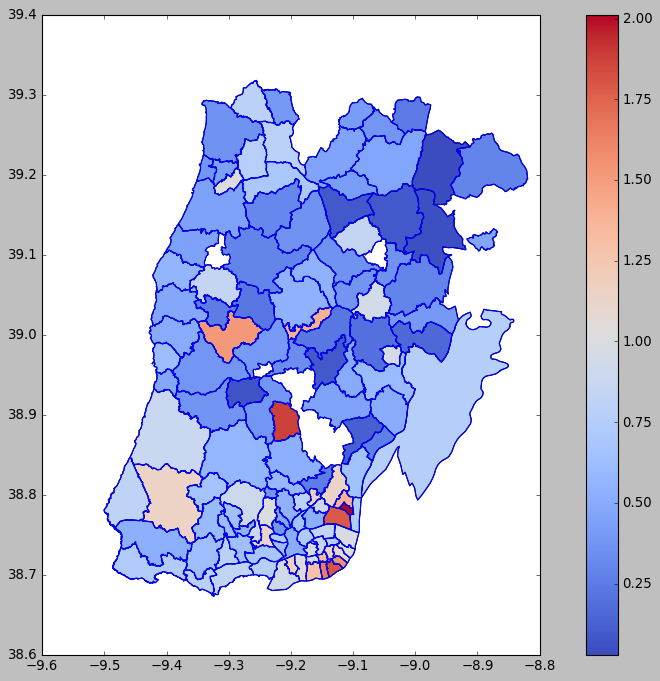

In [91]:
base = lis_geo_qu.boundary.plot(figsize=(15, 10))
lis_geo_qu.plot(ax=base, column='reviews_per_month', cmap='coolwarm', legend=True)

## Creating heat map of the logged average Total Reviews per area

In [92]:
lis_geo_qu = lis_geo.merge(loc_qu, on='neighbourhood')
lis_geo_qu.sort_values(by=['reviews_per_month'], inplace = True, ascending=False)

In [93]:
loc_tot = listings[["neighbourhood_cleansed",
                   "number_of_reviews"]]
loc_tot = loc_tot.rename(columns = {'neighbourhood_cleansed':'neighbourhood'})
loc_tot = loc_tot.dropna()
loc_tot = loc_tot.groupby(["neighbourhood"]).sum()

In [94]:
# Apply log transformation to smoothen data for visualization, and drop last 5 as they have 0 reviews giving log = -inf

loc_tot['log_rev'] = np.log2(loc_tot['number_of_reviews'])
loc_tot = loc_tot.drop(['Aveiras de Baixo',
                        'Aveiras de Cima',
                        'Ponte do Rol',
                        'Santo Anto e So Julio do Tojal',
                        'Painho e Figueiros'])

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [95]:
lis_geo_tot = lis_geo.merge(loc_tot, on='neighbourhood')
lis_geo_tot.sort_values(by=['number_of_reviews'], inplace = True, ascending=False)
lis_geo_tot.head(5)

geometry  \
neighbourhood                                                          
Santa Maria Maior  POLYGON ((-9.13426 38.71894, -9.13426 38.71893...   
Misericrdia        POLYGON ((-9.14341 38.71505, -9.14338 38.71503...   
So Vicente         POLYGON ((-9.11545 38.71885, -9.10900 38.71454...   
Arroios            POLYGON ((-9.13168 38.72331, -9.13236 38.72288...   
Santo Antnio       POLYGON ((-9.14113 38.71690, -9.14175 38.71645...   

                  neighbourhood_group  number_of_reviews  log_rev  
neighbourhood                                                      
Santa Maria Maior              Lisboa             251176    17.94  
Misericrdia                    Lisboa             174548    17.41  
So Vicente                     Lisboa              74356    16.18  
Arroios                        Lisboa              69659    16.09  
Santo Antnio                   Lisboa              57193    15.80

<AxesSubplot:>

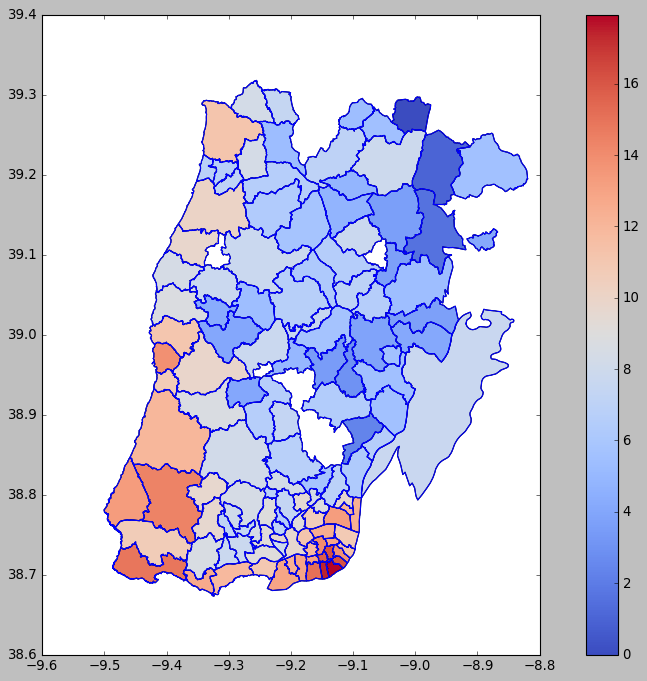

In [96]:
base = lis_geo_tot.boundary.plot(figsize=(15, 10))
lis_geo_tot.plot(ax=base, column='log_rev', cmap='coolwarm', legend=True)

## Sentiment Analysis of each area

In [97]:
lis_loc_id = lis_list[['id','neighbourhood_cleansed']]
lis_loc_id = lis_loc_id.rename(columns = {'id':'listing_id'})

In [98]:
rev_sen = reviews[['listing_id','comments']]
rev_sen['comments'] = rev_sen['comments'].astype(str)

/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/4178676372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_sen['comments'] = rev_sen['comments'].astype(str)


In [99]:
col1=[]
col2=[]
col3=[]
vader = SentimentIntensityAnalyzer()
for i in rev_sen['comments']:
    a = vader.polarity_scores(i)
    col1.append(a['neg'])
    col2.append(a['neu'])
    col3.append(a['pos'])
    
rev_sen['neg'] = col1
rev_sen['neu'] = col2
rev_sen['pos'] = col3

/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/2528719342.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_sen['neg'] = col1
/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/2528719342.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rev_sen['neu'] = col2
/var/folders/pl/yvypp34s3zq4wghbnvrj3nqc0000gp/T/ipykernel_58069/2528719342.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

In [100]:
sen_res = rev_sen
sen_res = sen_res[sen_res['neu'] < 1]
sen_res = sen_res.drop(columns = ['comments'])

In [101]:
sen_res = sen_res.groupby(['listing_id']).mean()
sen_res

neg  neu  pos
listing_id               
6499       0.02 0.69 0.29
25659      0.02 0.74 0.24
29248      0.02 0.71 0.27
29396      0.02 0.68 0.30
29720      0.01 0.64 0.35
...         ...  ...  ...
53396624   0.00 0.80 0.20
53396942   0.00 0.65 0.35
53409215   0.00 0.53 0.47
53487620   0.00 0.88 0.12
53491572   0.00 0.77 0.23

[15562 rows x 3 columns]

In [102]:
neigh_sen = sen_res.merge(lis_loc_id, on='listing_id')
neigh_sen = neigh_sen.drop(columns = ['listing_id'])
neigh_sen = neigh_sen.groupby(['neighbourhood_cleansed']).mean()
neigh_sen

neg  neu  pos
neighbourhood_cleansed                     
A dos Cunhados e Maceira     0.03 0.71 0.26
Abrigada e Cabanas de Torres 0.11 0.78 0.11
Agualva e Mira-Sintra        0.03 0.75 0.22
Ajuda                        0.02 0.66 0.30
Alcabideche                  0.03 0.68 0.29
...                           ...  ...  ...
Vila Franca de Xira          0.03 0.66 0.31
Vila Verde dos Francos       0.04 0.87 0.09
Vilar                        0.05 0.64 0.31
Vimeiro                      0.03 0.78 0.19
guas Livres                  0.02 0.67 0.31

[122 rows x 3 columns]

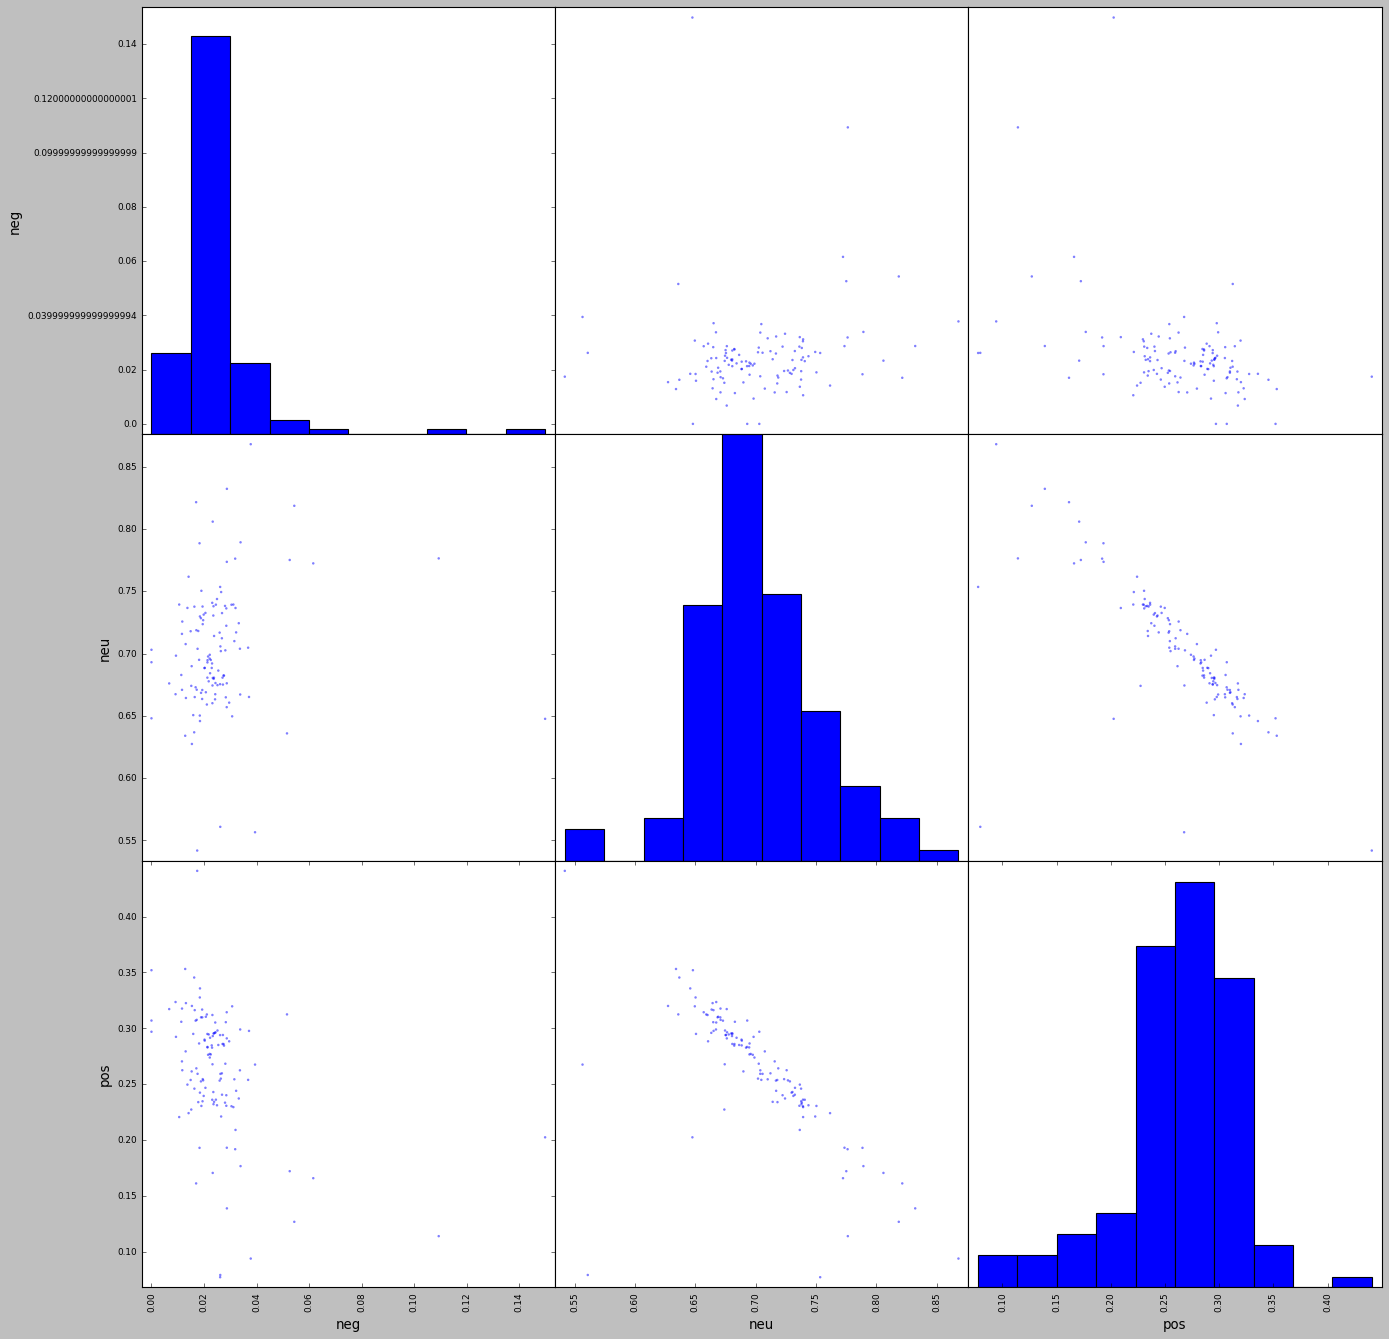

In [103]:
scat = pd.plotting.scatter_matrix(neigh_sen, figsize=(20,20), alpha=0.5)

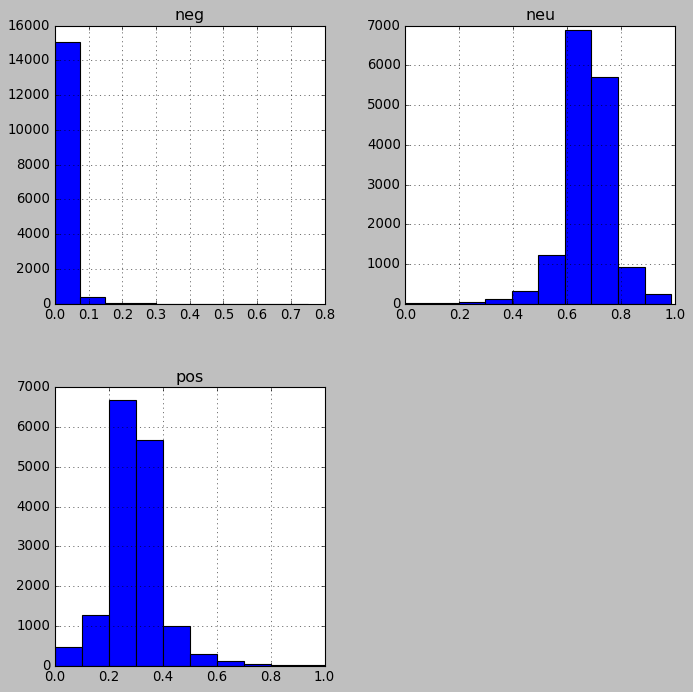

In [104]:
hist = sen_res.hist(figsize=(10,10))

## Regression Analysis on the review factors of each area that affect 30 day availability Data Prep

In [105]:
#Select the variables from lis_list that are to do with reviews
lis_ols = lis_list[['id',
                    'neighbourhood_cleansed',
                    'availability_30',
                    'number_of_reviews',
                    'review_scores_rating',
                    'review_scores_location',
                    'reviews_per_month']]
lis_ols = lis_ols.rename(columns = {'id':'listing_id'})
lis_ols

listing_id neighbourhood_cleansed  availability_30  number_of_reviews  \
0            6499                   Belm                7                 32   
1           25659      Santa Maria Maior               19                127   
2           29248      Santa Maria Maior                4                337   
3           29396      Santa Maria Maior               12                299   
4           29720                Estrela               21                 64   
...           ...                    ...              ...                ...   
18521    53715760           Santo Antnio               18                  0   
18522    53717168      Santa Maria Maior               18                  0   
18523    53718454         Avenidas Novas                0                  0   
18524    53723356      Santa Maria Maior               21                  0   
18525    53731212      Santa Maria Maior               16                  0   

       review_scores_rating  review_scores_location  reviews_per_month  
0                      4.50                    4.81               0.36  
1                      4.81                    4.88               1.37  
2                      4.56                    4.82               2.53  
3                      4.80                    4.88               2.57  
4                      4.92                    4.83               0.48  
...                     ...                     ...                ...  
18521                   NaN                     NaN                NaN  
18522                   NaN                     NaN                NaN  
18523                   NaN                     NaN                NaN  
18524                   NaN                     NaN                NaN  
18525                   NaN                     NaN                NaN  

[18526 rows x 7 columns]

In [106]:
#Merge sentiment analysis per listing with variables that have to do with reviews
ols_rev = lis_ols.merge(sen_res, on='listing_id')
ols_rev

listing_id neighbourhood_cleansed  availability_30  number_of_reviews  \
0            6499                   Belm                7                 32   
1           25659      Santa Maria Maior               19                127   
2           29248      Santa Maria Maior                4                337   
3           29396      Santa Maria Maior               12                299   
4           29720                Estrela               21                 64   
...           ...                    ...              ...                ...   
15556    53396624      Santa Maria Maior               28                  2   
15557    53396942      Santa Maria Maior               25                  1   
15558    53409215         Avenidas Novas               12                  2   
15559    53487620   Sacavm e Prior Velho               29                  1   
15560    53491572      Cascais e Estoril               19                  1   

       review_scores_rating  review_scores_location  reviews_per_month  neg  \
0                      4.50                    4.81               0.36 0.02   
1                      4.81                    4.88               1.37 0.02   
2                      4.56                    4.82               2.53 0.02   
3                      4.80                    4.88               2.57 0.02   
4                      4.92                    4.83               0.48 0.01   
...                     ...                     ...                ...  ...   
15556                  4.00                    5.00               2.00 0.00   
15557                  4.00                    5.00               1.00 0.00   
15558                  5.00                    4.50               2.00 0.00   
15559                  5.00                    5.00               1.00 0.00   
15560                  5.00                    5.00               1.00 0.00   

       neu  pos  
0     0.69 0.29  
1     0.74 0.24  
2     0.71 0.27  
3     0.68 0.30  
4     0.64 0.35  
...    ...  ...  
15556 0.80 0.20  
15557 0.65 0.35  
15558 0.53 0.47  
15559 0.88 0.12  
15560 0.77 0.23  

[15561 rows x 10 columns]

In [107]:
pd.options.display.float_format = '{:,.3f}'.format

In [108]:
ols_rev = ols_rev.dropna()
ols_rev

listing_id neighbourhood_cleansed  availability_30  number_of_reviews  \
0            6499                   Belm                7                 32   
1           25659      Santa Maria Maior               19                127   
2           29248      Santa Maria Maior                4                337   
3           29396      Santa Maria Maior               12                299   
4           29720                Estrela               21                 64   
...           ...                    ...              ...                ...   
15556    53396624      Santa Maria Maior               28                  2   
15557    53396942      Santa Maria Maior               25                  1   
15558    53409215         Avenidas Novas               12                  2   
15559    53487620   Sacavm e Prior Velho               29                  1   
15560    53491572      Cascais e Estoril               19                  1   

       review_scores_rating  review_scores_location  reviews_per_month   neg  \
0                     4.500                   4.810              0.360 0.018   
1                     4.810                   4.880              1.370 0.025   
2                     4.560                   4.820              2.530 0.021   
3                     4.800                   4.880              2.570 0.021   
4                     4.920                   4.830              0.480 0.012   
...                     ...                     ...                ...   ...   
15556                 4.000                   5.000              2.000 0.000   
15557                 4.000                   5.000              1.000 0.000   
15558                 5.000                   4.500              2.000 0.000   
15559                 5.000                   5.000              1.000 0.000   
15560                 5.000                   5.000              1.000 0.000   

        neu   pos  
0     0.687 0.294  
1     0.737 0.238  
2     0.707 0.272  
3     0.675 0.304  
4     0.638 0.350  
...     ...   ...  
15556 0.798 0.201  
15557 0.651 0.349  
15558 0.532 0.468  
15559 0.884 0.116  
15560 0.766 0.234  

[15554 rows x 10 columns]

In [109]:
Xlist = ['number_of_reviews',
                'review_scores_rating',
                'review_scores_location',
                'reviews_per_month',
                'neg',
                'pos']
Ylist = ['availability_30']

In [110]:
pipelines = []
pipelines.append(Pipeline([('linear', linear_model.LinearRegression())]))
pipelines.append(Pipeline([('Ridge', linear_model.Ridge())]))
pipelines.append(Pipeline([('Lasso', linear_model.Lasso(alpha = .5))]))
pipelines.append(Pipeline([('BayesianRidge', linear_model.BayesianRidge())]))
pipelines.append(Pipeline([('GradientBoosting',GradientBoostingRegressor(random_state=0))]))
pipelines.append(Pipeline([('KNeighborsRegressor', neighbors.KNeighborsRegressor())]))
pipelines.append(Pipeline([('DecisionTreeRegressor', tree.DecisionTreeRegressor())]))
pipelines.append(Pipeline([('MLPRegressor', MLPRegressor(random_state=1,hidden_layer_sizes = (4,6), activation='relu', max_iter=5000, solver='lbfgs'))]))
pipelines.append(Pipeline([('RandomForest', RandomForestRegressor(n_estimators=98, max_depth=4, random_state=0))]))

### Areas Chosen:
- From the average Review Score = 'A dos Cunhados e Maceira' (highest review score with over a 500 reviews pre filter)
- From the standard deviation of Price = 'Alcabideche' (highest price std with over 1000 reviews pre filter)
- From the average Number of Reviews per month = 'Misericrdia'(highest monthly reviews with over 1000 reviews post filter)
- From the logged average Total Reviews = 'Santa Maria Maior'

### 1.1) Running OLS Regression for 'A dos Cunhados e Maceira'

In [111]:
name1 = ['A dos Cunhados e Maceira']
ols_rev_1 = ols_rev[ols_rev.neighbourhood_cleansed.isin(name1)]

y = ols_rev_1[Ylist]
X = ols_rev_1[Xlist]

ols_rev_1 = ols_rev_1.drop(axis=1,columns=['listing_id'])
ols_rev_1[Xlist].describe()

number_of_reviews  review_scores_rating  review_scores_location  \
count             62.000                62.000                  62.000   
mean              16.645                 4.783                   4.783   
std               16.747                 0.295                   0.229   
min                1.000                 3.000                   4.000   
25%                6.250                 4.670                   4.713   
50%               12.000                 4.855                   4.830   
75%               24.750                 5.000                   4.967   
max              111.000                 5.000                   5.000   

       reviews_per_month    neg    pos  
count             62.000 62.000 62.000  
mean               0.476  0.026  0.259  
std                0.384  0.022  0.116  
min                0.020  0.000  0.000  
25%                0.200  0.008  0.194  
50%                0.390  0.025  0.253  
75%                0.670  0.036  0.328  
max                2.010  0.099  0.701

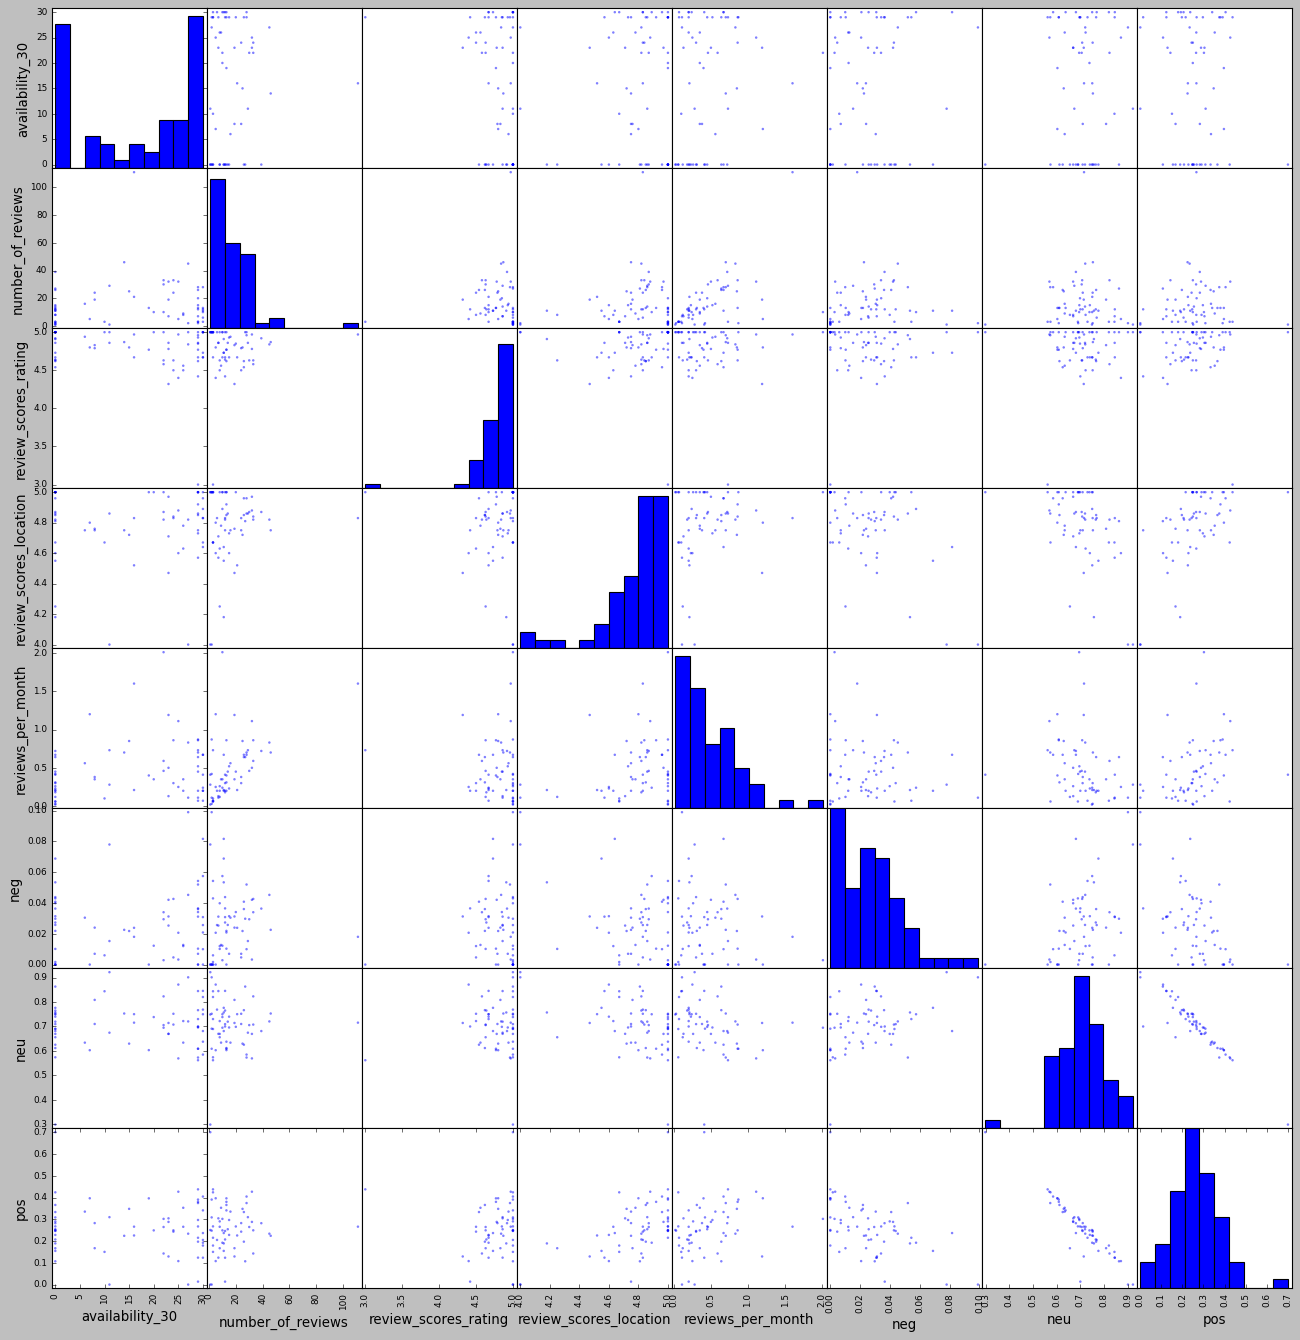

In [112]:
z = pd.plotting.scatter_matrix(ols_rev_1, figsize=(20,20), alpha=0.5)

In [113]:
# corr for A dos Cunhados e Maceira
ols_rev_1.corr()
#correlation coefficient of +1 indicates a perfect positive correlation. As variable x increases, variable y increases


availability_30  number_of_reviews  \
availability_30                   1.000              0.076   
number_of_reviews                 0.076              1.000   
review_scores_rating             -0.239              0.049   
review_scores_location            0.047              0.121   
reviews_per_month                 0.188              0.544   
neg                               0.074              0.041   
neu                               0.081             -0.014   
pos                              -0.100              0.024   

                        review_scores_rating  review_scores_location  \
availability_30                       -0.239                   0.047   
number_of_reviews                      0.049                   0.121   
review_scores_rating                   1.000                  -0.000   
review_scores_location                -0.000                   1.000   
reviews_per_month                     -0.052                   0.221   
neg                                    0.050                  -0.452   
neu                                    0.076                  -0.467   
pos                                    0.008                   0.569   

                        reviews_per_month    neg    neu    pos  
availability_30                     0.188  0.074  0.081 -0.100  
number_of_reviews                   0.544  0.041 -0.014  0.024  
review_scores_rating               -0.052  0.050  0.076  0.008  
review_scores_location              0.221 -0.452 -0.467  0.569  
reviews_per_month                   1.000 -0.159 -0.273  0.278  
neg                                -0.159  1.000  0.394 -0.530  
neu                                -0.273  0.394  1.000 -0.919  
pos                                 0.278 -0.530 -0.919  1.000

In [114]:
#OLS for A dos Cunhados e Maceira
X = sm.add_constant(data=X)
results = sm.OLS(endog=y, exog=X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        availability_30   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.378
Date:                Fri, 13 May 2022   Prob (F-statistic):              0.240
Time:                        01:02:24   Log-Likelihood:                -238.22
No. Observations:                  62   AIC:                             490.4
Df Residuals:                      55   BIC:                             505.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     21

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 1.2) Determing what other regressions effect have on 'A dos Cunhados e Maceira' data

In [115]:
y = ols_rev_1[Ylist]
X = ols_rev_1[Xlist]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

df=pd.DataFrame()
for pipeline in pipelines:
        pipeline = pipeline.fit(X_train, y_train.values.ravel()) 
        y_test_pred=pipeline.predict(X_test)
        
        df=df.append({'Model':  pipeline.steps[0][0], 
                        'fit':pipeline.score(X_train, y_train), 
                        #'Accuracy':pipeline.score(X_test, y_test),
                        # Mean absolute error 
                        'MAE': mes.mean_absolute_error(y_test, y_test_pred),
                        # Mean squared error 
                        'MSE': mes.mean_squared_error(y_test, y_test_pred),
                        # Median absolute error 
                        'MedAE': mes.median_absolute_error(y_test, y_test_pred), 
                        # Explain variance score 
                        'EVS': mes.explained_variance_score(y_test, y_test_pred),
                        #R2 score 
                        'R2':mes.r2_score(y_test, y_test_pred)                     
                       }, ignore_index=True)
df

Model    fit    MAE     MSE  MedAE    EVS     R2
0                 linear  0.175 11.603 166.819 11.526 -0.160 -0.174
1                  Ridge  0.145 11.371 160.758 13.926 -0.093 -0.131
2                  Lasso  0.090 11.442 159.080 12.242 -0.053 -0.120
3          BayesianRidge  0.000 11.371 153.451 10.168  0.000 -0.080
4       GradientBoosting  0.993 14.932 321.241 14.016 -1.158 -1.261
5    KNeighborsRegressor  0.164 11.523 176.126 10.400 -0.158 -0.239
6  DecisionTreeRegressor  1.000 16.846 401.462 17.000 -1.660 -1.825
7           MLPRegressor -0.000 11.372 153.487 10.163  0.000 -0.080
8           RandomForest  0.703 12.826 223.205 15.354 -0.501 -0.571

### 1.3) Using random forrest to determing the importance level of each feature of 'A dos Cunhados e Maceira'

In [116]:
y = ols_rev_1[Ylist]
X = ols_rev_1[Xlist]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

RandomForestReg=RandomForestRegressor(n_estimators=100, max_depth=10, random_state=0)
RandomForestResult = RandomForestReg.fit(X_train, y_train.values.ravel()) 

# Get numerical feature importances
importances = list(RandomForestResult.feature_importances_)

# List of tuples with variable and importance
feature_list = X.columns
feature_importances = [(feature, importance) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:30} Importance: {:,.3f}'.format(*pair)) for pair in feature_importances];

Variable: reviews_per_month              Importance: 0.202
Variable: review_scores_rating           Importance: 0.194
Variable: neg                            Importance: 0.174
Variable: number_of_reviews              Importance: 0.169
Variable: review_scores_location         Importance: 0.143
Variable: pos                            Importance: 0.119


### 2.1) Running OLS Regression for 'Alcabideche'

In [117]:
name2 = ['Alcabideche']
ols_rev_2 = ols_rev[ols_rev.neighbourhood_cleansed.isin(name2)]

y = ols_rev_2[Ylist]
X = ols_rev_2[Xlist]

ols_rev_2 = ols_rev_2.drop(axis=1,columns=['listing_id'])
ols_rev_2[Xlist].describe()

number_of_reviews  review_scores_rating  review_scores_location  \
count            101.000               101.000                 101.000   
mean              16.297                 4.699                   4.670   
std               19.607                 0.397                   0.372   
min                1.000                 3.000                   3.000   
25%                3.000                 4.590                   4.560   
50%                8.000                 4.810                   4.750   
75%               20.000                 5.000                   5.000   
max               82.000                 5.000                   5.000   

       reviews_per_month     neg     pos  
count            101.000 101.000 101.000  
mean               0.570   0.027   0.286  
std                0.630   0.032   0.135  
min                0.020   0.000   0.000  
25%                0.130   0.005   0.221  
50%                0.330   0.019   0.285  
75%                0.720   0.037   0.358  
max                3.190   0.199   0.881

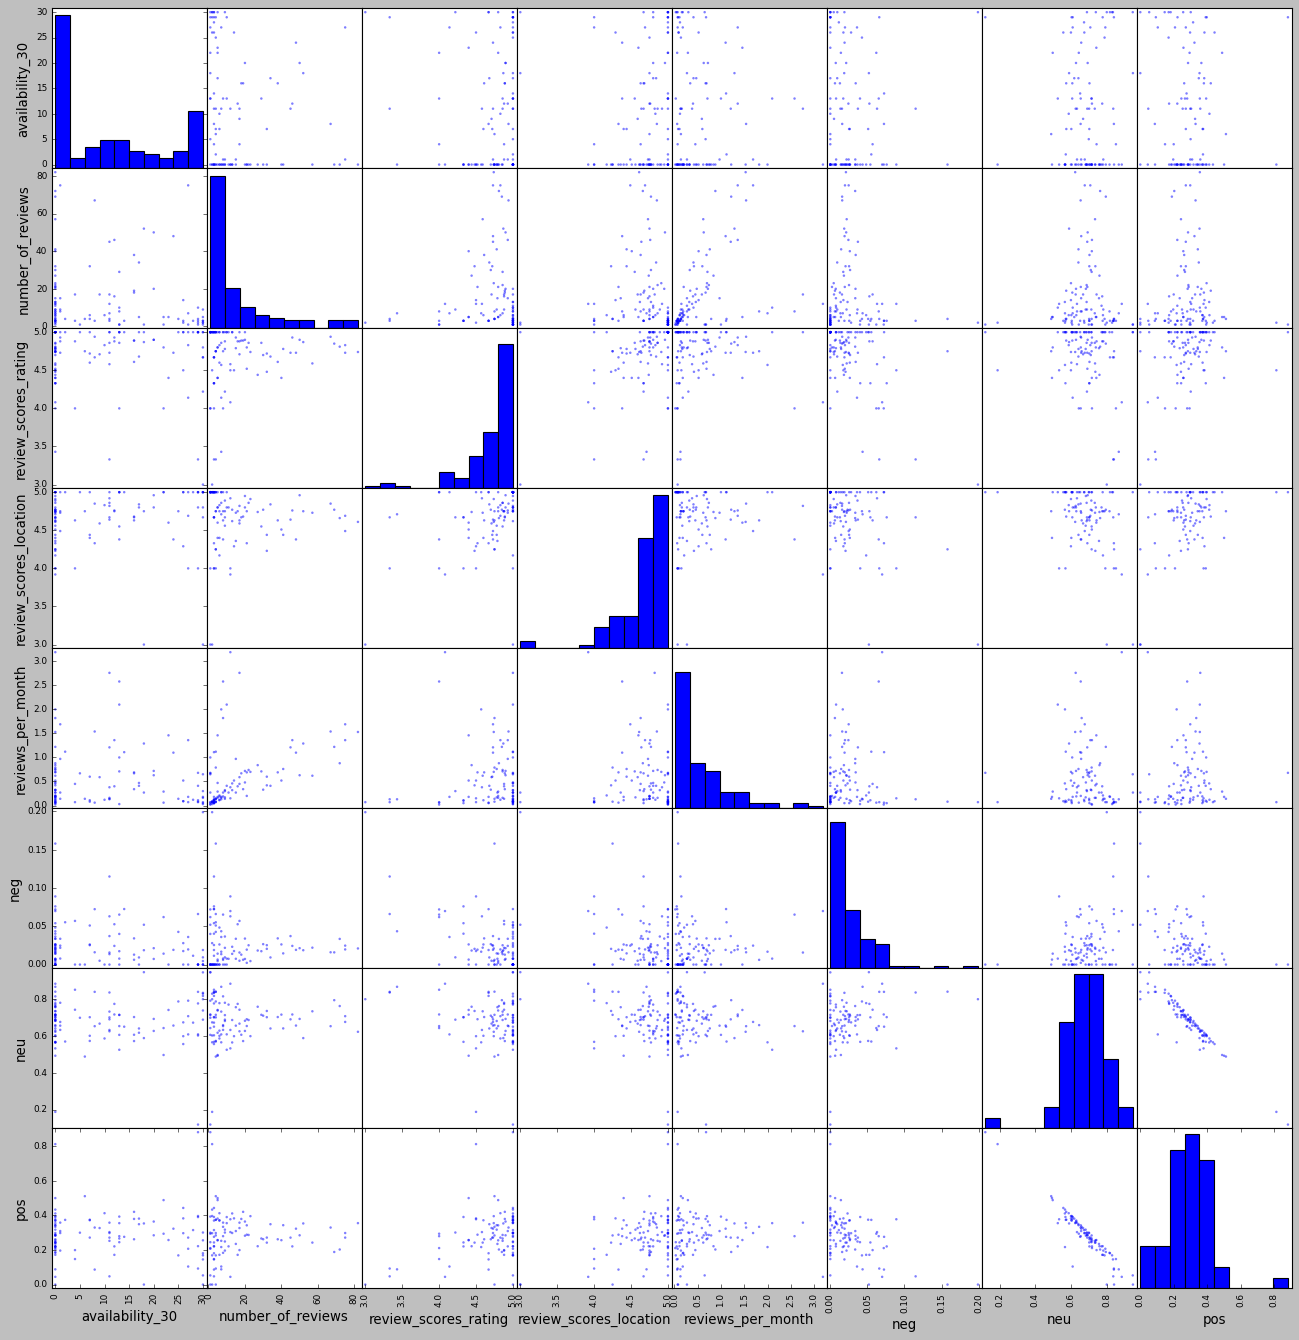

In [118]:
z = pd.plotting.scatter_matrix(ols_rev_2, figsize=(20,20), alpha=0.5)

In [119]:
# Corr for Alcabideche
ols_rev_2.corr()
#correlation coefficient of +1 indicates a perfect positive correlation. As variable x increases, variable y increases


availability_30  number_of_reviews  \
availability_30                   1.000             -0.176   
number_of_reviews                -0.176              1.000   
review_scores_rating             -0.021              0.101   
review_scores_location            0.071             -0.020   
reviews_per_month                -0.118              0.424   
neg                              -0.068             -0.096   
neu                               0.045              0.039   
pos                              -0.042             -0.003   

                        review_scores_rating  review_scores_location  \
availability_30                       -0.021                   0.071   
number_of_reviews                      0.101                  -0.020   
review_scores_rating                   1.000                   0.438   
review_scores_location                 0.438                   1.000   
reviews_per_month                      0.044                  -0.021   
neg                                   -0.555                  -0.454   
neu                                   -0.210                  -0.343   
pos                                    0.347                   0.383   

                        reviews_per_month    neg    neu    pos  
availability_30                    -0.118 -0.068  0.045 -0.042  
number_of_reviews                   0.424 -0.096  0.039 -0.003  
review_scores_rating                0.044 -0.555 -0.210  0.347  
review_scores_location             -0.021 -0.454 -0.343  0.383  
reviews_per_month                   1.000 -0.049 -0.055  0.013  
neg                                -0.049  1.000  0.277 -0.488  
neu                                -0.055  0.277  1.000 -0.939  
pos                                 0.013 -0.488 -0.939  1.000

In [120]:
#OLS for Alcabideche
X = sm.add_constant(data=X)
results = sm.OLS(endog=y, exog=X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        availability_30   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.9405
Date:                Fri, 13 May 2022   Prob (F-statistic):              0.470
Time:                        01:02:26   Log-Likelihood:                -383.11
No. Observations:                 101   AIC:                             780.2
Df Residuals:                      94   BIC:                             798.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     16

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 2.2) Determing what other regressions effect have on 'Alcabideche' data¶

In [121]:
y = ols_rev_2[Ylist]
X = ols_rev_2[Xlist]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

df=pd.DataFrame()
for pipeline in pipelines:
        pipeline = pipeline.fit(X_train, y_train.values.ravel()) 
        y_test_pred=pipeline.predict(X_test)
        
        df=df.append({'Model':  pipeline.steps[0][0], 
                        'fit':pipeline.score(X_train, y_train), 
                        #'Accuracy':pipeline.score(X_test, y_test),
                        # Mean absolute error 
                        'MAE': mes.mean_absolute_error(y_test, y_test_pred),
                        # Mean squared error 
                        'MSE': mes.mean_squared_error(y_test, y_test_pred),
                        # Median absolute error 
                        'MedAE': mes.median_absolute_error(y_test, y_test_pred), 
                        # Explain variance score 
                        'EVS': mes.explained_variance_score(y_test, y_test_pred),
                        #R2 score 
                        'R2':mes.r2_score(y_test, y_test_pred)                     
                       }, ignore_index=True)
df

Model    fit    MAE     MSE  MedAE    EVS     R2
0                 linear  0.107 11.548 171.491 11.565 -0.261 -0.399
1                  Ridge  0.080 11.127 163.340  9.602 -0.175 -0.332
2                  Lasso  0.048 10.742 148.518 10.640 -0.053 -0.212
3          BayesianRidge  0.045 10.689 146.604 10.479 -0.032 -0.196
4       GradientBoosting  0.980 13.007 208.490 13.055 -0.637 -0.701
5    KNeighborsRegressor  0.283 10.257 143.164  8.600 -0.104 -0.168
6  DecisionTreeRegressor  1.000 14.286 296.571 11.000 -1.144 -1.419
7           MLPRegressor -0.000 10.523 144.776  9.575  0.000 -0.181
8           RandomForest  0.720 12.395 181.613 13.375 -0.359 -0.482

### 2.3) Using random forrest to determing the importance level of each feature of 'Alcabideche'

In [122]:
y = ols_rev_2[Ylist]
X = ols_rev_2[Xlist]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

RandomForestReg=RandomForestRegressor(n_estimators=98, max_depth=4, random_state=0)
RandomForestResult = RandomForestReg.fit(X_train, y_train.values.ravel()) 

# Get numerical feature importances
importances = list(RandomForestResult.feature_importances_)

# List of tuples with variable and importance
feature_list = X.columns
feature_importances = [(feature, importance) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:30} Importance: {:,.3f}'.format(*pair)) for pair in feature_importances];

Variable: pos                            Importance: 0.238
Variable: neg                            Importance: 0.205
Variable: review_scores_rating           Importance: 0.151
Variable: review_scores_location         Importance: 0.150
Variable: number_of_reviews              Importance: 0.141
Variable: reviews_per_month              Importance: 0.115


### 3.1) Running OLS Regression for 'Misericrdia'

In [137]:
name3 = ['Misericrdia']
ols_rev_3 = ols_rev[ols_rev.neighbourhood_cleansed.isin(name3)]
y = ols_rev_3[Ylist]
X = ols_rev_3[Xlist]

ols_rev_3 = ols_rev_3.drop(axis=1,columns=['listing_id'])
ols_rev_3[Xlist].describe()

number_of_reviews  review_scores_rating  review_scores_location  \
count          2,035.000             2,035.000               2,035.000   
mean              85.761                 4.632                   4.845   
std              101.283                 0.386                   0.194   
min                1.000                 1.000                   1.000   
25%               13.000                 4.500                   4.800   
50%               52.000                 4.720                   4.880   
75%              125.000                 4.860                   4.950   
max            1,550.000                 5.000                   5.000   

       reviews_per_month       neg       pos  
count          2,035.000 2,035.000 2,035.000  
mean               1.658     0.024     0.305  
std                1.468     0.021     0.086  
min                0.010     0.000     0.000  
25%                0.600     0.014     0.264  
50%                1.380     0.021     0.303  
75%                2.415     0.029     0.341  
max               28.900     0.244     1.000

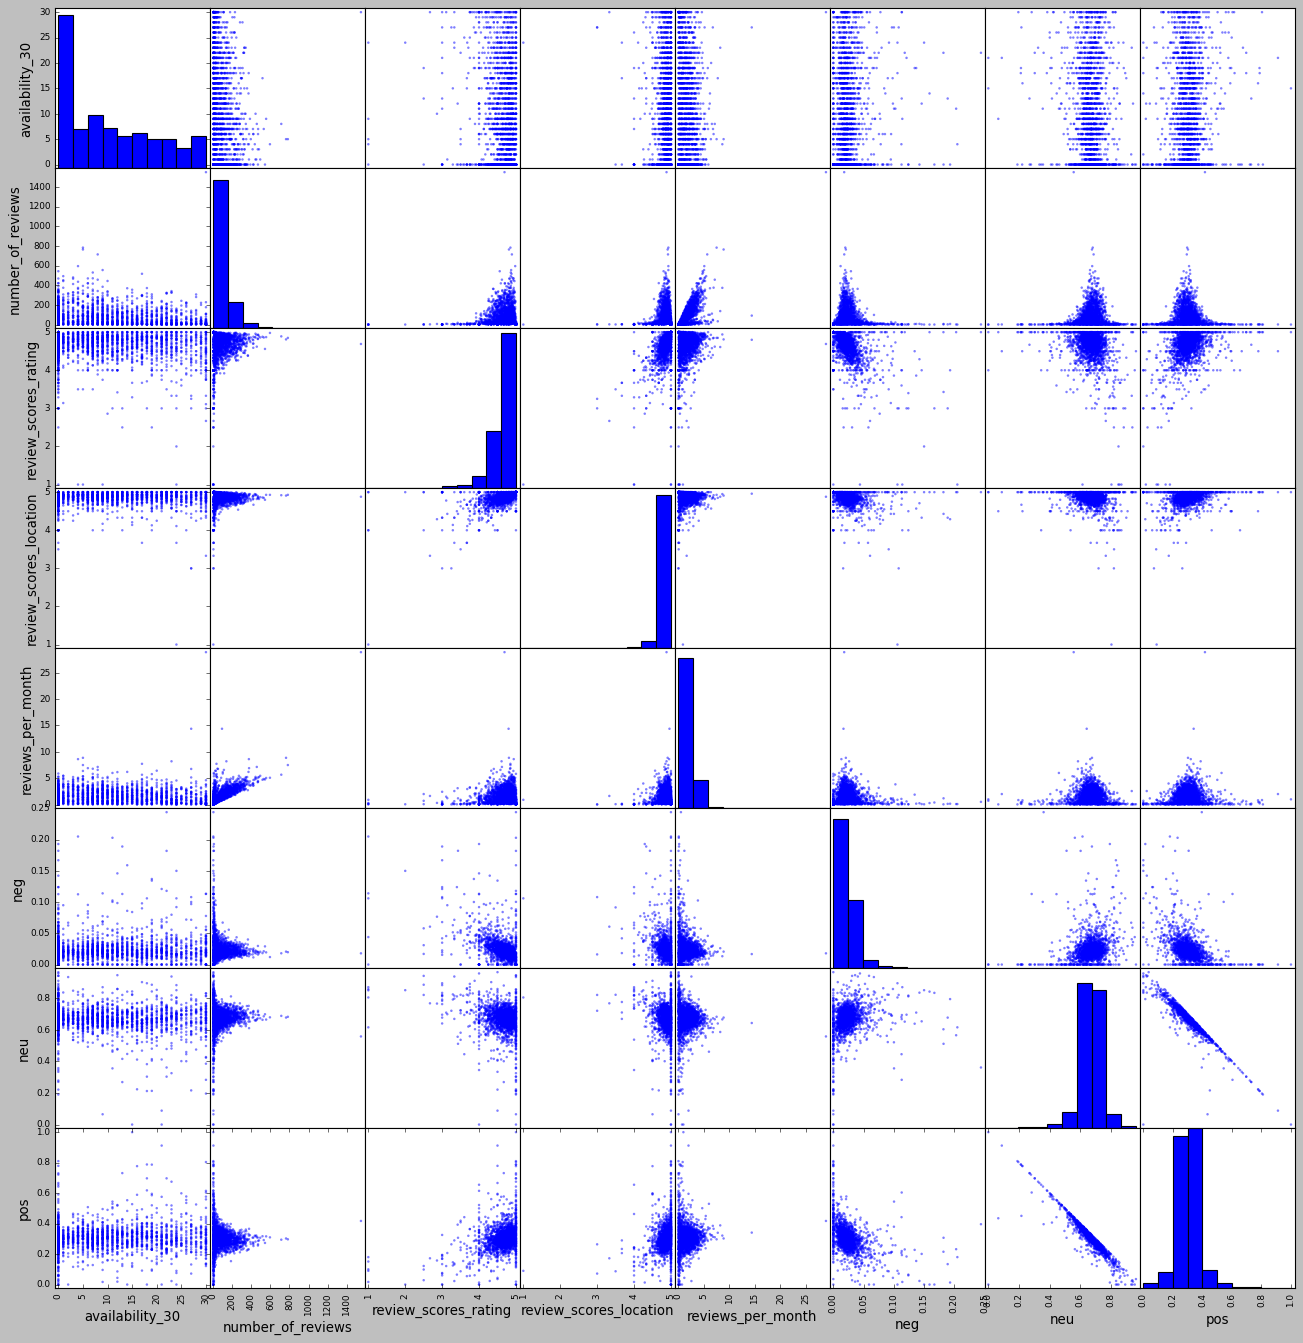

In [138]:
z = pd.plotting.scatter_matrix(ols_rev_3, figsize=(20,20), alpha=0.5)

In [139]:
#Corr for Misericrdia
ols_rev_3.corr()
#correlation coefficient of +1 indicates a perfect positive correlation. As variable x increases, variable y increases


availability_30  number_of_reviews  \
availability_30                   1.000             -0.120   
number_of_reviews                -0.120              1.000   
review_scores_rating             -0.091              0.175   
review_scores_location           -0.055              0.054   
reviews_per_month                 0.010              0.750   
neg                               0.046             -0.091   
neu                              -0.107              0.107   
pos                               0.078             -0.071   

                        review_scores_rating  review_scores_location  \
availability_30                       -0.091                  -0.055   
number_of_reviews                      0.175                   0.054   
review_scores_rating                   1.000                   0.529   
review_scores_location                 0.529                   1.000   
reviews_per_month                      0.156                   0.073   
neg                                   -0.461                  -0.270   
neu                                   -0.238                  -0.188   
pos                                    0.350                   0.248   

                        reviews_per_month    neg    neu    pos  
availability_30                     0.010  0.046 -0.107  0.078  
number_of_reviews                   0.750 -0.091  0.107 -0.071  
review_scores_rating                0.156 -0.461 -0.238  0.350  
review_scores_location              0.073 -0.270 -0.188  0.248  
reviews_per_month                   1.000 -0.093 -0.027  0.056  
neg                                -0.093  1.000  0.210 -0.430  
neu                                -0.027  0.210  1.000 -0.919  
pos                                 0.056 -0.430 -0.919  1.000

In [140]:
#OLS for Misericrdia
X = sm.add_constant(data=X)
results = sm.OLS(endog=y, exog=X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        availability_30   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     18.14
Date:                Sat, 14 May 2022   Prob (F-statistic):           1.31e-20
Time:                        02:07:56   Log-Likelihood:                -7380.7
No. Observations:                2035   AIC:                         1.478e+04
Df Residuals:                    2028   BIC:                         1.481e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     21

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 3.2) Determing what other regressions effect have on 'Misericrdia' data

In [141]:
y = ols_rev_3[Ylist]
X = ols_rev_3[Xlist]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

df=pd.DataFrame()
for pipeline in pipelines:
        pipeline = pipeline.fit(X_train, y_train.values.ravel()) 
        y_test_pred=pipeline.predict(X_test)
        
        df=df.append({'Model':  pipeline.steps[0][0], 
                        'fit':pipeline.score(X_train, y_train), 
                        #'Accuracy':pipeline.score(X_test, y_test),
                        # Mean absolute error 
                        'MAE': mes.mean_absolute_error(y_test, y_test_pred),
                        # Mean squared error 
                        'MSE': mes.mean_squared_error(y_test, y_test_pred),
                        # Median absolute error 
                        'MedAE': mes.median_absolute_error(y_test, y_test_pred), 
                        # Explain variance score 
                        'EVS': mes.explained_variance_score(y_test, y_test_pred),
                        #R2 score 
                        'R2':mes.r2_score(y_test, y_test_pred)                     
                       }, ignore_index=True)
df

Model   fit   MAE     MSE  MedAE    EVS     R2
0                 linear 0.062 7.589  81.964  7.535 -0.002 -0.004
1                  Ridge 0.061 7.598  81.959  7.468 -0.002 -0.004
2                  Lasso 0.044 7.654  82.596  7.777 -0.010 -0.012
3          BayesianRidge 0.058 7.622  81.917  7.666 -0.002 -0.004
4       GradientBoosting 0.300 7.596  84.322  7.354 -0.031 -0.033
5    KNeighborsRegressor 0.227 7.960  92.878  7.400 -0.137 -0.138
6  DecisionTreeRegressor 1.000 9.179 147.577  8.000 -0.807 -0.808
7           MLPRegressor 0.080 7.594  81.721  7.657  0.002 -0.001
8           RandomForest 0.154 7.555  81.449  7.464  0.004  0.002

### 3.3) Using random forrest to determing the importance level of each feature of 'Misericrdia'

In [142]:
y = ols_rev_3[Ylist]
X = ols_rev_3[Xlist]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

RandomForestReg=RandomForestRegressor(n_estimators=98, max_depth=4, random_state=0)
RandomForestResult = RandomForestReg.fit(X_train, y_train.values.ravel()) 

# Get numerical feature importances
importances = list(RandomForestResult.feature_importances_)

# List of tuples with variable and importance
feature_list = X.columns
feature_importances = [(feature, importance) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:30} Importance: {:,.3f}'.format(*pair)) for pair in feature_importances];

Variable: pos                            Importance: 0.253
Variable: reviews_per_month              Importance: 0.222
Variable: number_of_reviews              Importance: 0.206
Variable: review_scores_rating           Importance: 0.153
Variable: neg                            Importance: 0.108
Variable: review_scores_location         Importance: 0.058


### 4.1) Running OLS Regression for 'Santa Maria Maior'

In [136]:
name4 = ['Santa Maria Maior']
ols_rev_4 = ols_rev[ols_rev.neighbourhood_cleansed.isin(name4)]
y = ols_rev_4[Ylist]
X = ols_rev_4[Xlist]

ols_rev_4 = ols_rev_4.drop(axis=1,columns=['listing_id'])
ols_rev_4[Xlist].describe()

number_of_reviews  review_scores_rating  review_scores_location  \
count          2,689.000             2,689.000               2,689.000   
mean              93.389                 4.642                   4.846   
std               97.991                 0.369                   0.244   
min                1.000                 1.000                   1.000   
25%               17.000                 4.530                   4.820   
50%               59.000                 4.730                   4.910   
75%              142.000                 4.860                   4.970   
max              900.000                 5.000                   5.000   

       reviews_per_month       neg       pos  
count          2,689.000 2,689.000 2,689.000  
mean               1.827     0.024     0.297  
std                1.925     0.021     0.082  
min                0.010     0.000     0.000  
25%                0.710     0.015     0.255  
50%                1.570     0.021     0.294  
75%                2.620     0.029     0.334  
max               64.440     0.270     1.000

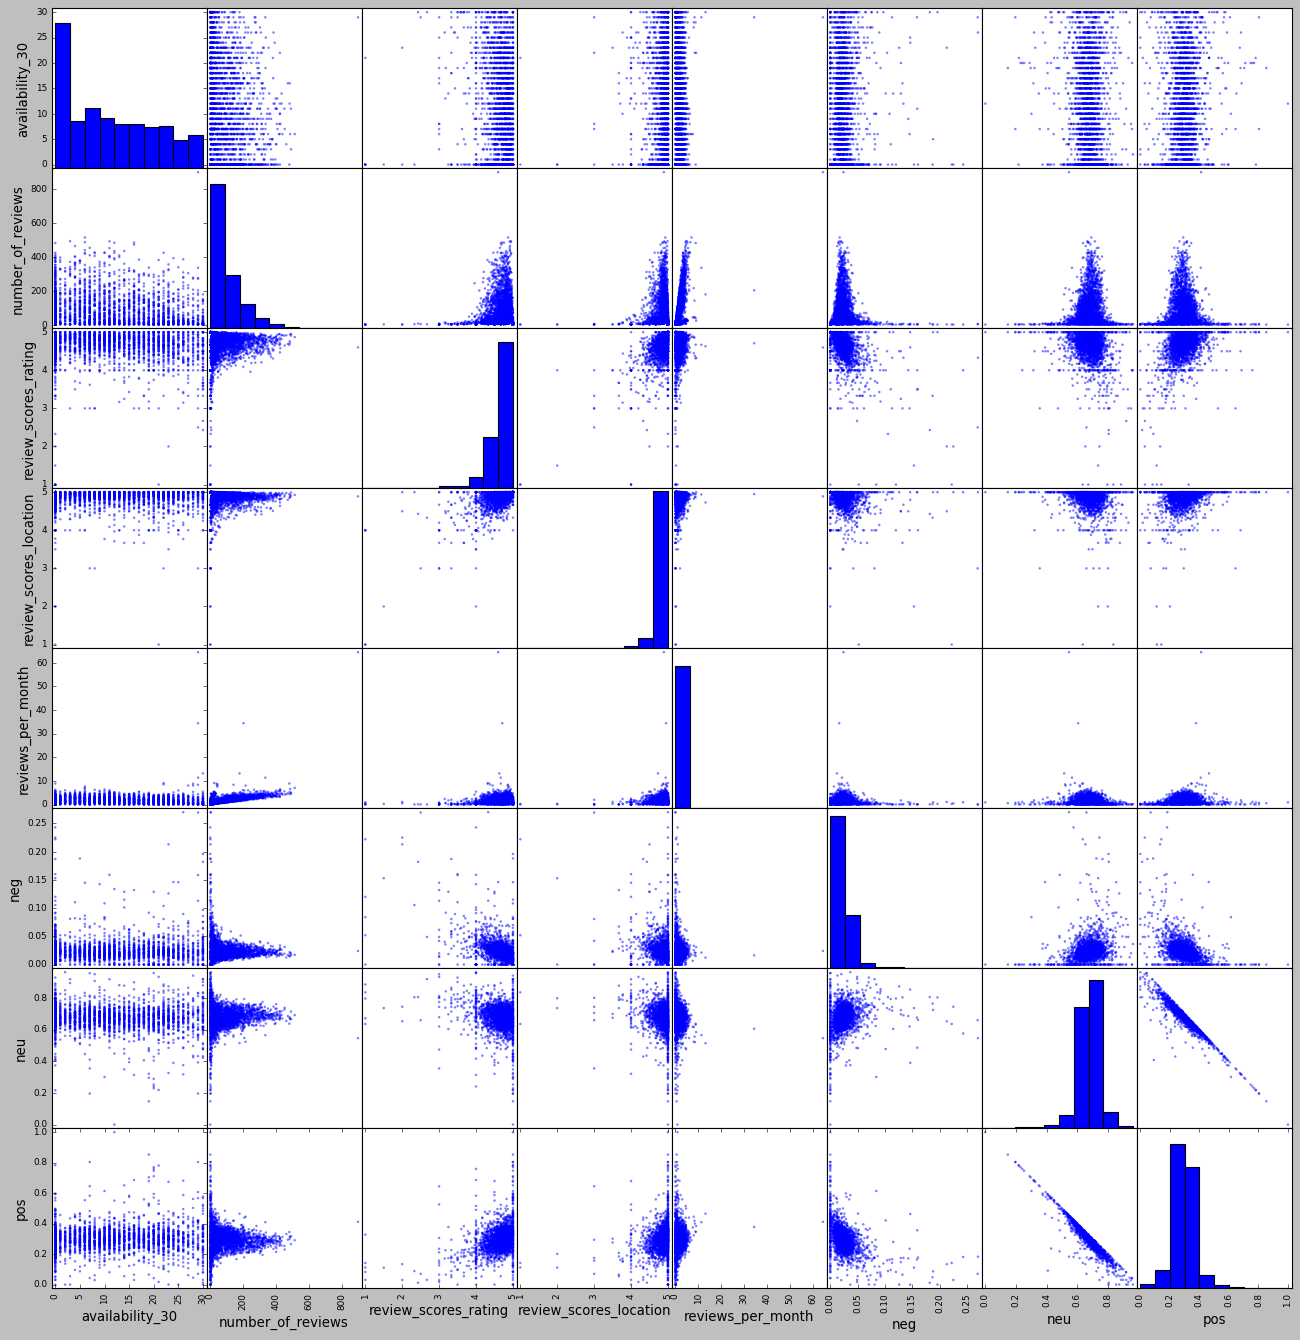

In [130]:
z = pd.plotting.scatter_matrix(ols_rev_4, figsize=(20,20), alpha=0.5)

In [131]:
#Corr for Santa Maria Maior
ols_rev_4.corr()
#correlation coefficient of +1 indicates a perfect positive correlation. As variable x increases, variable y increases


availability_30  number_of_reviews  \
availability_30                   1.000             -0.124   
number_of_reviews                -0.124              1.000   
review_scores_rating             -0.115              0.181   
review_scores_location           -0.036              0.071   
reviews_per_month                 0.033              0.604   
neg                               0.044             -0.078   
neu                              -0.110              0.092   
pos                               0.091             -0.058   

                        review_scores_rating  review_scores_location  \
availability_30                       -0.115                  -0.036   
number_of_reviews                      0.181                   0.071   
review_scores_rating                   1.000                   0.582   
review_scores_location                 0.582                   1.000   
reviews_per_month                      0.126                   0.069   
neg                                   -0.488                  -0.280   
neu                                   -0.237                  -0.160   
pos                                    0.349                   0.226   

                        reviews_per_month    neg    neu    pos  
availability_30                     0.033  0.044 -0.110  0.091  
number_of_reviews                   0.604 -0.078  0.092 -0.058  
review_scores_rating                0.126 -0.488 -0.237  0.349  
review_scores_location              0.069 -0.280 -0.160  0.226  
reviews_per_month                   1.000 -0.074 -0.088  0.100  
neg                                -0.074  1.000  0.205 -0.436  
neu                                -0.088  0.205  1.000 -0.949  
pos                                 0.100 -0.436 -0.949  1.000

In [132]:
#OLS for Santa Maria Maior
X = sm.add_constant(data=X)
results = sm.OLS(endog=y, exog=X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:        availability_30   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     26.35
Date:                Fri, 13 May 2022   Prob (F-statistic):           1.25e-30
Time:                        01:02:30   Log-Likelihood:                -9713.0
No. Observations:                2689   AIC:                         1.944e+04
Df Residuals:                    2682   BIC:                         1.948e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     17

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### 4) Determing what other regressions effect have on 'Santa Maria Maior' data

In [133]:
y = ols_rev_4[Ylist]
X = ols_rev_4[Xlist]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

df=pd.DataFrame()
for pipeline in pipelines:
        pipeline = pipeline.fit(X_train, y_train.values.ravel()) 
        y_test_pred=pipeline.predict(X_test)
        
        df=df.append({'Model':  pipeline.steps[0][0], 
                        'fit':pipeline.score(X_train, y_train), 
                        #'Accuracy':pipeline.score(X_test, y_test),
                        # Mean absolute error 
                        'MAE': mes.mean_absolute_error(y_test, y_test_pred),
                        # Mean squared error 
                        'MSE': mes.mean_squared_error(y_test, y_test_pred),
                        # Median absolute error 
                        'MedAE': mes.median_absolute_error(y_test, y_test_pred), 
                        # Explain variance score 
                        'EVS': mes.explained_variance_score(y_test, y_test_pred),
                        #R2 score 
                        'R2':mes.r2_score(y_test, y_test_pred)                     
                       }, ignore_index=True)
df

Model   fit   MAE     MSE  MedAE    EVS     R2
0                 linear 0.051 7.903  83.867  8.148  0.061  0.058
1                  Ridge 0.051 7.909  83.945  8.178  0.060  0.057
2                  Lasso 0.028 7.973  84.884  8.132  0.050  0.047
3          BayesianRidge 0.050 7.921  84.238  8.129  0.057  0.054
4       GradientBoosting 0.267 7.797  82.740  7.971  0.074  0.071
5    KNeighborsRegressor 0.222 8.232  95.951  7.600 -0.068 -0.077
6  DecisionTreeRegressor 1.000 9.364 144.390  7.000 -0.616 -0.621
7           MLPRegressor 0.003 8.205  89.335  8.764  0.000 -0.003
8           RandomForest 0.145 7.820  82.487  8.313  0.078  0.074

### 4.3) Using random forrest to determing the importance level of each feature of 'Santa Maria Maior'

In [134]:
y = ols_rev_4[Ylist]
X = ols_rev_4[Xlist]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

RandomForestReg=RandomForestRegressor(n_estimators=98, max_depth=4, random_state=0)
RandomForestResult = RandomForestReg.fit(X_train, y_train.values.ravel()) 

# Get numerical feature importances
importances = list(RandomForestResult.feature_importances_)

# List of tuples with variable and importance
feature_list = X.columns
feature_importances = [(feature, importance) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:30} Importance: {:,.3f}'.format(*pair)) for pair in feature_importances];

Variable: pos                            Importance: 0.284
Variable: number_of_reviews              Importance: 0.197
Variable: review_scores_rating           Importance: 0.191
Variable: reviews_per_month              Importance: 0.187
Variable: review_scores_location         Importance: 0.078
Variable: neg                            Importance: 0.062


All files related to this project: https://github.com/MrJay7/PDS